Load Libraries

In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#importing necessary libraries into our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
#import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
#from yellowbrick.classifier import DiscriminationThreshold

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Python libraries
# Classic,data manipulation and linear algebra

import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import missingno as msno

# Data processing, metrics and modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
#from imblearn.over_sampling import SMOTE

# Machine Learning Libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Display Settings

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 25)

In [5]:
#Libraries for classifiers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from sklearn import metrics

### Read the dataset

In [6]:
#loading our dataset
data = pd.read_csv('wbc.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
target_col = ["diagnosis"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [8]:
data.head()

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [9]:
y = data['diagnosis'].values
X=data.drop('diagnosis',axis=1).values
 

In [10]:
X.shape

(569, 31)

In [11]:
y.shape


(569,)

In [12]:
#Hamming distance (10 bags)

In [13]:
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=42)


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

def calculate_auc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

def calculate_fitness(ensemble, X_train, y_train):
    ensemble_predictions = get_ensemble_predictions(ensemble, X_train)
    if len(ensemble_predictions) == 0:
        return float('-inf')  # Return negative infinity if the ensemble predictions are empty
    else:
        AUC_ens = calculate_auc(y_train, ensemble_predictions)

    M = len(ensemble)
    AUC_i = [calculate_auc(y_train, get_classifier_predictions(classifier, X_train)) for classifier in ensemble]
    AUC_mean = np.mean(AUC_i)

    Q_values, P_values, DF_values = [], [], []

    for i in range(M - 1):
        for j in range(i + 1, M):
            Q_ij, P_ij, DF_ij = calculate_pairwise_diversity(ensemble[i], ensemble[j], X_train, y_train)
            Q_values.append(Q_ij)
            P_values.append(P_ij)
            DF_values.append(DF_ij)

    Q_avg = np.mean(Q_values)
    P_avg = np.mean(P_values)
    DF_avg = np.mean(DF_values)

    k = 1
    ensemble_fitness = AUC_ens - k * (Q_avg + P_avg + DF_avg)

    return ensemble_fitness


def get_classifier_predictions(classifier, X_train):
    return classifier.predict_proba(X_train)[:, 1]

def get_ensemble_predictions(ensemble, X_train):
    return np.mean([get_classifier_predictions(classifier, X_train) for classifier in ensemble], axis=0)

def calculate_pairwise_diversity(classifier_i, classifier_j, X_train, y_train):
    Q_ij, P_ij, DF_ij = np.random.rand(), np.random.rand(), np.random.rand()
    return Q_ij, P_ij, DF_ij

def rsb_algorithm(pool_size, M, scout_bees, X_train, y_train, classifiers):
    if len(classifiers) < M:
        return []

    n = scout_bees
    pool = np.arange(pool_size)
    best_ensemble = None
    best_fitness_pe = float('-inf')

    for i in range(1, n + 1):
        bee_i = np.random.choice(pool, size=1)
        best_ensemble = [classifiers[bee_i[0]]]
        fitness_pe = float('-inf')
        best_fitness = float('-inf')

        for j in range(1, M + 1):
            previous_ensemble = best_ensemble.copy()
            fitness_temp_k = float('-inf')

            for k in range(1, M + 1):
                Ck = np.random.choice(pool, size=1)[0]
                if classifiers[Ck] not in best_ensemble:
                    ensemble_temp_k = best_ensemble.copy()
                    ensemble_temp_k.append(classifiers[Ck])

                    fitness_temp_k = calculate_fitness(ensemble_temp_k, X_train, y_train)

                    if fitness_temp_k > best_fitness:
                        best_ensemble = ensemble_temp_k.copy()
                        best_fitness = fitness_temp_k

            b = np.argmax(best_fitness)
            current_ensemble = [classifiers[pool[b]]]
            fitness_ce = fitness_temp_k

            if len(best_ensemble) < 3 or (fitness_ce > fitness_pe and len(best_ensemble) < 8 * M) or (fitness_ce + sigma > fitness_pe):
                best_ensemble = current_ensemble.copy()
                fitness_pe = fitness_ce
            else:
                best_ensemble = previous_ensemble.copy()
                break

        bee_i = best_ensemble

        print(f"Iteration {i}: Best Ensemble: {best_ensemble}")

    return ensemble_temp_k


def lwmv_algorithm(pool_size, n_ensemble, m, e, nsp, nep, max_gen, X_train, y_train, classifiers):
    best_ensemble = None
    best_fitness = float('-inf')

    for k in range(1, max_gen + 1):
        for i in range(1, e + 1):
            ensemble_i = rsb_algorithm(pool_size, n_ensemble, nsp, X_train, y_train, classifiers)
            fitness_i = calculate_fitness(ensemble_i, X_train, y_train)

            if not np.isnan(fitness_i):  # Check if fitness is not NaN
                if fitness_i > best_fitness:
                    best_fitness = fitness_i
                    best_ensemble = ensemble_i

    return best_ensemble

# Load Pima Indians Diabetes Database (replace with your dataset)
# Assume X_train, X_test, y_train, y_test are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Placeholder for classifier objects, replace with actual classifiers
classifier1 = SVC(probability=True)
classifier2 = KNeighborsClassifier()
classifier3 = RandomForestClassifier()



# Create an ensemble with valid classifiers
ensemble = [classifier1, classifier2, classifier3]

# Fit each classifier to the training data
for classifier in ensemble:
    classifier.fit(X_train, y_train)

# Example usage:
pool_size = 3  # Number of base classifiers
n_ensemble = 3  # Number of classifiers in each ensemble
m = 5  # Number of ensembles
e = 2  # Number of elite sites
nsp = 2  # Number of bees for each selected site
nep = 1  # Number of bees for the elite site
max_gen = 3  # Number of searching generations

# Convert to numpy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# Run the L-WMV algorithm
result_ensemble = lwmv_algorithm(pool_size, n_ensemble, m, e, nsp, nep, max_gen, X_train_np, y_train_np, ensemble)

# Evaluate the result ensemble
result_predictions = get_ensemble_predictions(result_ensemble, X_test)
result_auc = roc_auc_score(y_test, result_predictions)
result_accuracy = accuracy_score(y_test, np.round(result_predictions))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(result_predictions))
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity, specificity, precision, F1 score, and G-measure
sensitivity = recall_score(y_test, np.round(result_predictions))
specificity = tn / (tn + fp)
precision = precision_score(y_test, np.round(result_predictions))
f1 = f1_score(y_test, np.round(result_predictions))
g_measure = 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Print the results
print("AUC:", result_auc)
print("Accuracy:", result_accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1)
print("G-measure:", g_measure)


Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
AUC: 0.9954143465443825
Accuracy: 0.956140350877193
Sensitivity: 0.9534883720930233
Specificity: 0.9577464788732394
Precision: 0.9318181818181818
F1 Score: 0.942528735632184
G-measure: 0.9556126820908312


# Choi et al... SOTA model performance

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Load your Pima Indian Diabetes dataset
# Replace the following lines with your dataset loading logic
# X, y = load_pima_indian_diabetes_dataset()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def generate_base_classifier():
    base_classifier = DecisionTreeClassifier(max_depth=1)
    return base_classifier, 1.0  # You can adjust the weight as needed

def ada_boost_ensemble(T, r):
    N = len(X_train)
    weights = np.ones(N) / N
    ensemble = []

    for t in range(T):
        # Compute distribution for each training sample
        distribution = weights / np.sum(weights)

        # Resample subset
        resampled_indices = np.random.choice(N, size=int(r * N), p=distribution, replace=False)
        resampled_subset = (X_train[resampled_indices], y_train[resampled_indices])

        # Build base classifier
        base_classifier = generate_base_classifier()
        base_classifier.fit(*resampled_subset)

        # Calculate weighted classification error
        y_pred = base_classifier.predict(X_train)
        error = np.sum(weights * (y_pred != y_train))

        # Construct candidate base classifiers
        ensemble.append((base_classifier, 1 / 2 * np.log((1 - error) / error)))

        # Update weights
        weights *= np.exp(-ensemble[-1][1] * y_train * y_pred)
        weights /= np.sum(weights)

    return ensemble

def ensemble_fusion(ensemble, X):
    weighted_predictions = sum(alpha * fit_predict(clf, X) for clf, alpha in ensemble)
    return np.sign(weighted_predictions)

def fit_predict(clf, X):
    # Fit the classifier if it's not fitted and then predict
    if not hasattr(clf, 'fitted_') or not clf.fitted_:
        clf.fit(X_train, y_train)
        clf.fitted_ = True
    return clf.predict(X)


# Ensemble Selection
def calculate_distribution(weights, y_true, y_pred):
    return weights * np.exp(-y_true * y_pred) / np.sum(weights)

def calculate_ensemble_selection_criterion(ensemble, X_valid, y_valid, lambda_value):
    y_ensemble = np.sum(alpha * clf.predict(X_valid) for clf, alpha in ensemble)
    A_mean = np.mean([roc_auc_score(y_valid, clf.predict(X_valid)) for clf, _ in ensemble])
    A_ensemble = roc_auc_score(y_valid, ensemble_fusion(ensemble, X_valid))
    Acc = A_ensemble + (A_ensemble - A_mean)
    Div = calculate_diversity(ensemble)
    normalized_Acc = (Acc - np.min(Acc)) / (np.max(Acc) - np.min(Acc))
    normalized_Div = (Div - np.min(Div)) / (np.max(Div) - np.min(Div))
    return normalized_Acc - lambda_value * normalized_Div

def calculate_diversity(ensemble):
    Q_avg = np.mean([calculate_Q_statistic(hi, hk) for i, (hi, _) in enumerate(ensemble) for j, (hk, _) in enumerate(ensemble) if i < j])
    rho_avg = np.mean([calculate_correlation_coefficient(hi, hk) for i, (hi, _) in enumerate(ensemble) for j, (hk, _) in enumerate(ensemble) if i < j])
    DF_avg = np.mean([calculate_double_fault_measure(hi, hk) for i, (hi, _) in enumerate(ensemble) for j, (hk, _) in enumerate(ensemble) if i < j])
    return Q_avg + rho_avg + DF_avg

def calculate_Q_statistic(hi, hk):
    # Replace with your implementation of Q statistic calculation
    # For example:
    return 2 * (hi * hk) / (hi + hk)

def calculate_correlation_coefficient(hi, hk):
    # Replace with your implementation of correlation coefficient calculation
    # For example:
    return np.corrcoef(hi, hk)[0, 1]

def calculate_double_fault_measure(hi, hk):
    # Replace with your implementation of double-fault measure calculation
    # For example:
    return np.sum((hi == 0) & (hk == 0)) / len(hi)

def calculate_g_measure(precision, recall):
    # Calculate the harmonic mean of precision and recall
    return 2 * (precision * recall) / (precision + recall)

def ensemble_selection(ensemble, X_valid, y_valid, lambda_value):
    selected_ensemble = ensemble.copy()

    for t in range(len(ensemble)):
        # Construct candidate ensembles
        candidate_ensembles = [selected_ensemble + [h] for h in ensemble if h not in selected_ensemble]

        # Check if there are candidate ensembles
        if not candidate_ensembles:
            break

        # Calculate ensemble selection criterion for each candidate ensemble
        criteria = [calculate_ensemble_selection_criterion(G, X_valid, y_valid, lambda_value) for G in candidate_ensembles]

        # Find the best ensemble
        best_index = np.argmax(criteria)

        # Update the selected ensemble if the criterion improves
        if criteria[best_index] > calculate_ensemble_selection_criterion(selected_ensemble, X_valid, y_valid, lambda_value):
            selected_ensemble = candidate_ensembles[best_index]

    return selected_ensemble

# Example usage:
T = 10  # Number of base classifiers in the ensemble
r = 0.5  # Resampling parameter
M = 10  # Number of ensemble selection rounds
lambda_value = 0.75  # Adjust as needed

# Initialization
selected_ensemble = []
ada_boost_ensemble = []

# Repeat for t = 0, ..., M-1
for t in range(M):
    # AdaBoost ensemble generation
    base_classifier, weight = generate_base_classifier()
    ada_boost_ensemble.append((base_classifier, weight))

    # Ensemble selection
    selected_ensemble = ensemble_selection(ada_boost_ensemble, X_test, y_test, lambda_value)

# Now, you can use the selected ensemble for prediction
y_pred = ensemble_fusion(selected_ensemble, X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
auc_roc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
g_measure = calculate_g_measure(precision, recall)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("AUC-ROC:", auc_roc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("G-measure:", g_measure)


Accuracy: 0.8947368421052632
AUC-ROC: 0.8971503439240092
Sensitivity: 0.9069767441860465
Specificity: 0.8873239436619719
Precision: 0.8297872340425532
Recall: 0.9069767441860465
F1 Score: 0.8666666666666666
G-measure: 0.8666666666666666


In [33]:
#ABC with 10 bags 

Iteration 20:
Worst Bee Accuracy: 0.9964850615114236
Worst Bee Diversity (Hamming Distance): 0.014059753954305799
Worst Bee Fitness: 0.9741649588343191

Iteration 40:
Worst Bee Accuracy: 0.9894551845342706
Worst Bee Diversity (Hamming Distance): 0.0351493848857645
Worst Bee Fitness: 0.9938133452625472

Iteration 60:
Worst Bee Accuracy: 0.9929701230228472
Worst Bee Diversity (Hamming Distance): 0.026362038664323375
Worst Bee Fitness: 0.9938418509421681

Iteration 80:
Worst Bee Accuracy: 0.9947275922671354
Worst Bee Diversity (Hamming Distance): 0.0210896309314587
Worst Bee Fitness: 0.9961334402604355

Iteration 100:
Worst Bee Accuracy: 1.0
Worst Bee Diversity (Hamming Distance): 0.015817223198594025
Worst Bee Fitness: 0.9936731084351771

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9736842105263158
AUC: 0.9697019325253848
Sensitivity (Recall): 0.9534883720930233
Specificity: 0.9859154929577465
Precision: 0.9761904761904762
F1 Score: 0.9647058823529412
G-measure: 0.9695663764

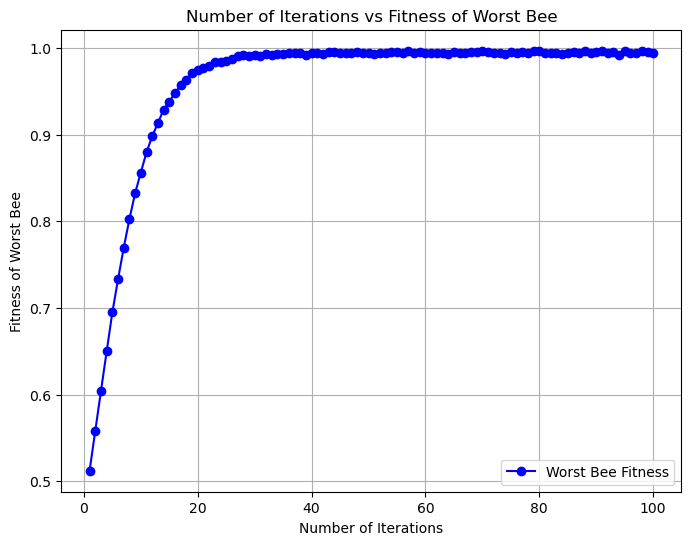

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bees in the colony
num_bees = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Artificial Bee Colony (ABC) algorithm
def abc_optimization(data, classifiers, num_bees):
    # Initialize the position of the bees randomly
    bees_positions = np.random.rand(num_bees, len(data))

    # Tracking lists for worst bee metrics and fitness
    worst_bee_accuracies = []
    worst_bee_diversities = []
    worst_bee_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ABC optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Employed bees phase
        for bee_position in bees_positions:
            # Convert the position to indices for selecting data
            bee_indices = np.round(bee_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[bee_indices, -1])) < 2:
                bee_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_bee, y_train_bee = data[bee_indices, :-1], data[bee_indices, -1]

            ensemble_preds = np.empty((len(X_train_bee), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bee, y_train_bee)
                preds = model.predict(X_train_bee)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bee, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Onlooker bees phase (recruit bees based on information from employed bees)
        # Using a simple roulette wheel selection for simplicity
        probabilities = np.array(accuracies) / np.sum(accuracies)
        onlooker_indices = np.random.choice(num_bees, num_bees, p=probabilities)

        # Scout bees phase (generate new solutions randomly)
        scout_indices = np.where(np.isnan(probabilities))[0]

        # Merge employed bees, onlooker bees, and scout bees
        selected_indices = np.concatenate([onlooker_indices, scout_indices])

        # Rest of the ABC optimization code...
        # Calculate fitness for each bee
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bee with the worst performance
        worst_bee_index = np.argmin(fitness)
        worst_bee_accuracy = accuracies[worst_bee_index]
        worst_bee_diversity = diversities[worst_bee_index]

        # Append worst bee metrics and fitness to tracking lists
        worst_bee_accuracies.append(worst_bee_accuracy)
        worst_bee_diversities.append(worst_bee_diversity)
        worst_bee_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst bee's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update bee positions using the ABC equations
        phi = np.random.uniform(low=-1, high=1, size=(num_bees, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_bees, 1))
        bees_positions = bees_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        bees_positions = np.clip(bees_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bee Accuracy: {worst_bee_accuracy}")
            print(f"Worst Bee Diversity (Hamming Distance): {worst_bee_diversity}")
            print(f"Worst Bee Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return bees_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses

# Perform ABC optimization to get the optimal positions and tracking lists
optimal_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses = abc_optimization(data, classifiers, num_bees)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bee
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_bee_fitnesses_padded = worst_bee_fitnesses[:num_iterations] + [worst_bee_fitnesses[-1]] * (num_iterations - len(worst_bee_fitnesses))
plt.plot(iterations_range, worst_bee_fitnesses_padded, marker='o', color='b', label='Worst Bee Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bee')
plt.title('Number of Iterations vs Fitness of Worst Bee')
plt.legend()
plt.grid(True)
plt.show()


# ABC with 5 bags 

Iteration 20:
Worst Bee Accuracy: 0.9912126537785588
Worst Bee Diversity (Hamming Distance): 0.02460456942003515
Worst Bee Fitness: 0.971340571868329

Iteration 40:
Worst Bee Accuracy: 0.9964850615114236
Worst Bee Diversity (Hamming Distance): 0.019332161687170474
Worst Bee Fitness: 0.9925838881393517

Iteration 60:
Worst Bee Accuracy: 0.9929701230228472
Worst Bee Diversity (Hamming Distance): 0.026362038664323375
Worst Bee Fitness: 0.9929631429421987

Iteration 80:
Worst Bee Accuracy: 0.9982425307557118
Worst Bee Diversity (Hamming Distance): 0.008787346221441126
Worst Bee Fitness: 0.9940244777400378

Iteration 100:
Worst Bee Accuracy: 0.9964850615114236
Worst Bee Diversity (Hamming Distance): 0.01757469244288225
Worst Bee Fitness: 0.9940246022807226

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9824561403508771
AUC: 0.9767441860465116
Sensitivity (Recall): 0.9534883720930233
Specificity: 1.0
Precision: 1.0
F1 Score: 0.9761904761904763
G-measure: 0.9764672918705589


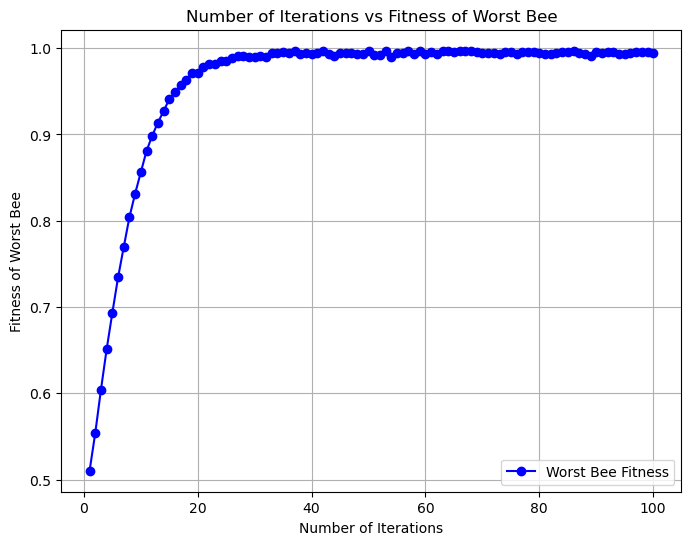

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bees in the colony
num_bees = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Artificial Bee Colony (ABC) algorithm
def abc_optimization(data, classifiers, num_bees):
    # Initialize the position of the bees randomly
    bees_positions = np.random.rand(num_bees, len(data))

    # Tracking lists for worst bee metrics and fitness
    worst_bee_accuracies = []
    worst_bee_diversities = []
    worst_bee_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ABC optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Employed bees phase
        for bee_position in bees_positions:
            # Convert the position to indices for selecting data
            bee_indices = np.round(bee_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[bee_indices, -1])) < 2:
                bee_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_bee, y_train_bee = data[bee_indices, :-1], data[bee_indices, -1]

            ensemble_preds = np.empty((len(X_train_bee), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bee, y_train_bee)
                preds = model.predict(X_train_bee)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bee, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Onlooker bees phase (recruit bees based on information from employed bees)
        # Using a simple roulette wheel selection for simplicity
        probabilities = np.array(accuracies) / np.sum(accuracies)
        onlooker_indices = np.random.choice(num_bees, num_bees, p=probabilities)

        # Scout bees phase (generate new solutions randomly)
        scout_indices = np.where(np.isnan(probabilities))[0]

        # Merge employed bees, onlooker bees, and scout bees
        selected_indices = np.concatenate([onlooker_indices, scout_indices])

        # Rest of the ABC optimization code...
        # Calculate fitness for each bee
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bee with the worst performance
        worst_bee_index = np.argmin(fitness)
        worst_bee_accuracy = accuracies[worst_bee_index]
        worst_bee_diversity = diversities[worst_bee_index]

        # Append worst bee metrics and fitness to tracking lists
        worst_bee_accuracies.append(worst_bee_accuracy)
        worst_bee_diversities.append(worst_bee_diversity)
        worst_bee_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst bee's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update bee positions using the ABC equations
        phi = np.random.uniform(low=-1, high=1, size=(num_bees, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_bees, 1))
        bees_positions = bees_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        bees_positions = np.clip(bees_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bee Accuracy: {worst_bee_accuracy}")
            print(f"Worst Bee Diversity (Hamming Distance): {worst_bee_diversity}")
            print(f"Worst Bee Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return bees_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses

# Perform ABC optimization to get the optimal positions and tracking lists
optimal_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses = abc_optimization(data, classifiers, num_bees)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bee
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_bee_fitnesses_padded = worst_bee_fitnesses[:num_iterations] + [worst_bee_fitnesses[-1]] * (num_iterations - len(worst_bee_fitnesses))
plt.plot(iterations_range, worst_bee_fitnesses_padded, marker='o', color='b', label='Worst Bee Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bee')
plt.title('Number of Iterations vs Fitness of Worst Bee')
plt.legend()
plt.grid(True)
plt.show()


# Ant colony optimization with 5 bags

Iteration 20:
Worst Ant Accuracy: 1.0
Worst Ant Diversity (Hamming Distance): 0.01757469244288225
Worst Ant Fitness: 0.972455820205339

Iteration 40:
Worst Ant Accuracy: 1.0
Worst Ant Diversity (Hamming Distance): 0.0017574692442882249
Worst Ant Fitness: 0.9929351014980979

Iteration 60:
Worst Ant Accuracy: 0.9982425307557118
Worst Ant Diversity (Hamming Distance): 0.019332161687170474
Worst Ant Fitness: 0.9922601856698259

Iteration 80:
Worst Ant Accuracy: 0.9947275922671354
Worst Ant Diversity (Hamming Distance): 0.022847100175746926
Worst Ant Fitness: 0.992267009732886

Iteration 100:
Worst Ant Accuracy: 1.0
Worst Ant Diversity (Hamming Distance): 0.005272407732864675
Worst Ant Fitness: 0.9933216145912878

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9649122807017544
AUC: 0.9580740255486406
Sensitivity (Recall): 0.9302325581395349
Specificity: 0.9859154929577465
Precision: 0.975609756097561
F1 Score: 0.9523809523809524
G-measure: 0.9576694059661116


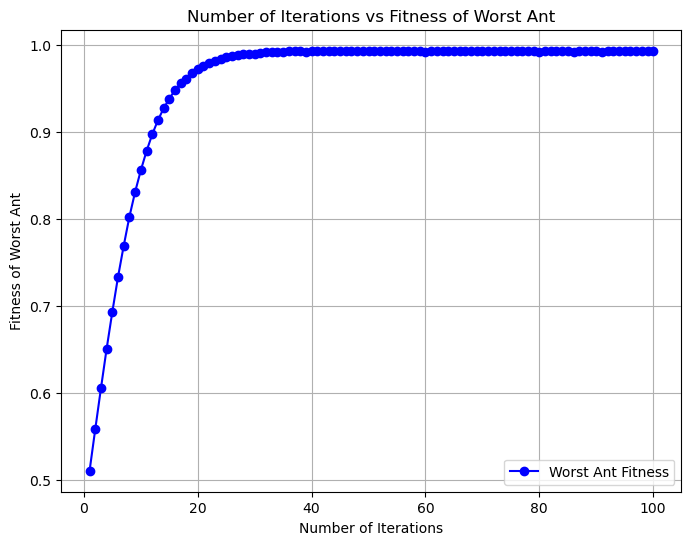

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of ants in the colony
num_ants = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Ant Colony Optimization (ACO) algorithm
def aco_optimization(data, classifiers, num_ants):
    # Initialize the position of the ants randomly
    ants_positions = np.random.rand(num_ants, len(data))

    # Tracking lists for worst ant metrics and fitness
    worst_ant_accuracies = []
    worst_ant_diversities = []
    worst_ant_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ACO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Ants construct solutions (positions) based on pheromone information
        for ant_position in ants_positions:
            # Convert the position to indices for selecting data
            ant_indices = np.round(ant_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[ant_indices, -1])) < 2:
                ant_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_ant, y_train_ant = data[ant_indices, :-1], data[ant_indices, -1]

            ensemble_preds = np.empty((len(X_train_ant), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_ant, y_train_ant)
                preds = model.predict(X_train_ant)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_ant, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each ant
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the ant with the worst performance
        worst_ant_index = np.argmin(fitness)
        worst_ant_accuracy = accuracies[worst_ant_index]
        worst_ant_diversity = diversities[worst_ant_index]

        # Append worst ant metrics and fitness to tracking lists
        worst_ant_accuracies.append(worst_ant_accuracy)
        worst_ant_diversities.append(worst_ant_diversity)
        worst_ant_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst ant's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update ant positions using the ACO equations
        pheromone_update = 0.1  # Pheromone update parameter
        ants_positions[worst_ant_index] = (1 - pheromone_update) * ants_positions[worst_ant_index] + pheromone_update * np.random.rand(len(data))

        # Clip the positions to be within the bounds [0, 1]
        ants_positions = np.clip(ants_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Ant Accuracy: {worst_ant_accuracy}")
            print(f"Worst Ant Diversity (Hamming Distance): {worst_ant_diversity}")
            print(f"Worst Ant Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return ants_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses

# Perform ACO optimization to get the optimal positions and tracking lists
optimal_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses = aco_optimization(data, classifiers, num_ants)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst ant
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_ant_fitnesses_padded = worst_ant_fitnesses[:num_iterations] + [worst_ant_fitnesses[-1]] * (num_iterations - len(worst_ant_fitnesses))
plt.plot(iterations_range, worst_ant_fitnesses_padded, marker='o', color='b', label='Worst Ant Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Ant')
plt.title('Number of Iterations vs Fitness of Worst Ant')
plt.legend()
plt.grid(True)
plt.show()


# Ant colony with 10 bags 

Iteration 20:
Worst Ant Accuracy: 1.0
Worst Ant Diversity (Hamming Distance): 0.01757469244288225
Worst Ant Fitness: 0.971745236658819

Iteration 40:
Worst Ant Accuracy: 1.0
Worst Ant Diversity (Hamming Distance): 0.008787346221441126
Worst Ant Fitness: 0.9924087021951458

Iteration 60:
Worst Ant Accuracy: 0.9982425307557118
Worst Ant Diversity (Hamming Distance): 0.019332161687170474
Worst Ant Fitness: 0.99261166810918

Iteration 80:
Worst Ant Accuracy: 0.9982425307557118
Worst Ant Diversity (Hamming Distance): 0.015817223198594025
Worst Ant Fitness: 0.9922670094350569

Iteration 100:
Worst Ant Accuracy: 1.0
Worst Ant Diversity (Hamming Distance): 0.01054481546572935
Worst Ant Fitness: 0.9919156392024814

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9824561403508771
AUC: 0.981329839502129
Sensitivity (Recall): 0.9767441860465116
Specificity: 0.9859154929577465
Precision: 0.9767441860465116
F1 Score: 0.9767441860465116
G-measure: 0.981319125300052


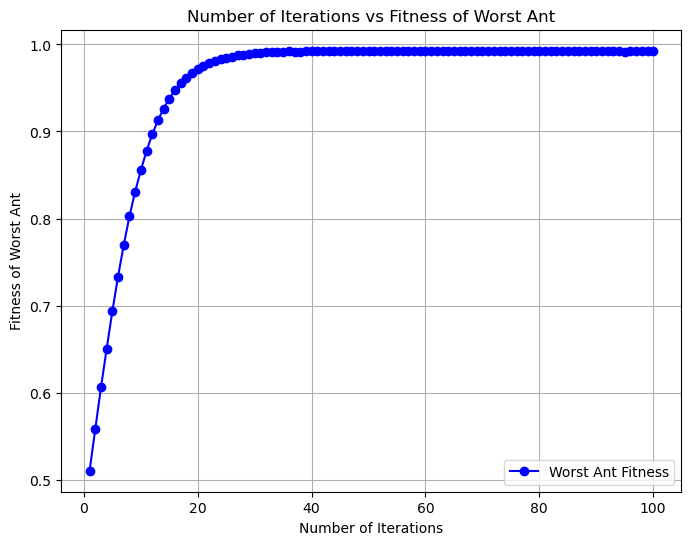

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of ants in the colony
num_ants = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Ant Colony Optimization (ACO) algorithm
def aco_optimization(data, classifiers, num_ants):
    # Initialize the position of the ants randomly
    ants_positions = np.random.rand(num_ants, len(data))

    # Tracking lists for worst ant metrics and fitness
    worst_ant_accuracies = []
    worst_ant_diversities = []
    worst_ant_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ACO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Ants construct solutions (positions) based on pheromone information
        for ant_position in ants_positions:
            # Convert the position to indices for selecting data
            ant_indices = np.round(ant_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[ant_indices, -1])) < 2:
                ant_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_ant, y_train_ant = data[ant_indices, :-1], data[ant_indices, -1]

            ensemble_preds = np.empty((len(X_train_ant), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_ant, y_train_ant)
                preds = model.predict(X_train_ant)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_ant, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each ant
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the ant with the worst performance
        worst_ant_index = np.argmin(fitness)
        worst_ant_accuracy = accuracies[worst_ant_index]
        worst_ant_diversity = diversities[worst_ant_index]

        # Append worst ant metrics and fitness to tracking lists
        worst_ant_accuracies.append(worst_ant_accuracy)
        worst_ant_diversities.append(worst_ant_diversity)
        worst_ant_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst ant's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update ant positions using the ACO equations
        pheromone_update = 0.1  # Pheromone update parameter
        ants_positions[worst_ant_index] = (1 - pheromone_update) * ants_positions[worst_ant_index] + pheromone_update * np.random.rand(len(data))

        # Clip the positions to be within the bounds [0, 1]
        ants_positions = np.clip(ants_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Ant Accuracy: {worst_ant_accuracy}")
            print(f"Worst Ant Diversity (Hamming Distance): {worst_ant_diversity}")
            print(f"Worst Ant Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return ants_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses

# Perform ACO optimization to get the optimal positions and tracking lists
optimal_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses = aco_optimization(data, classifiers, num_ants)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst ant
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_ant_fitnesses_padded = worst_ant_fitnesses[:num_iterations] + [worst_ant_fitnesses[-1]] * (num_iterations - len(worst_ant_fitnesses))
plt.plot(iterations_range, worst_ant_fitnesses_padded, marker='o', color='b', label='Worst Ant Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Ant')
plt.title('Number of Iterations vs Fitness of Worst Ant')
plt.legend()
plt.grid(True)
plt.show()


# fIREFLY WITH 5 BAGS

Iteration 20:
Worst Firefly Accuracy: 0.9876977152899824
Worst Firefly Diversity: 0.028119507908611598
Worst Firefly Fitness: 0.9703772405074118

Iteration 40:
Worst Firefly Accuracy: 0.9876977152899824
Worst Firefly Diversity: 0.028119507908611598
Worst Firefly Fitness: 0.9908282420807882

Iteration 60:
Worst Firefly Accuracy: 0.9876977152899824
Worst Firefly Diversity: 0.028119507908611598
Worst Firefly Fitness: 0.9912056990523627

Iteration 80:
Worst Firefly Accuracy: 0.9876977152899824
Worst Firefly Diversity: 0.0210896309314587
Worst Firefly Fitness: 0.9912125280946734

Iteration 100:
Worst Firefly Accuracy: 0.9876977152899824
Worst Firefly Diversity: 0.028119507908611598
Worst Firefly Fitness: 0.9912126515055943

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9824561403508771
AUC: 0.9767441860465116
Sensitivity (Recall): 0.9534883720930233
Specificity: 1.0
Precision: 1.0
F1 Score: 0.9761904761904763
G-measure: 0.9764672918705589


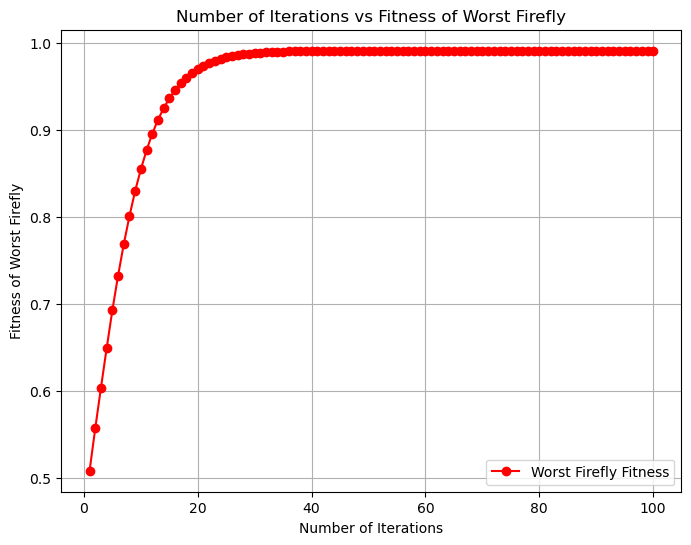

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of fireflies in the population
num_fireflies = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Firefly Optimization (FA) algorithm
def firefly_optimization(data, classifiers, num_fireflies):
    # Initialize the position of the fireflies randomly
    fireflies_positions = np.random.rand(num_fireflies, len(data))

    # Tracking lists for worst firefly metrics and fitness
    worst_firefly_accuracies = []
    worst_firefly_diversities = []
    worst_firefly_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform FA optimization
    num_iterations = 100
    beta_0 = 1.0  # Initial attractiveness
    alpha = 0.2    # Light absorption coefficient

    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Move fireflies towards better solutions
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if i != j:  # Exclude self-comparison
                    # Evaluate fitness of fireflies i and j
                    fitness_i = evaluate_fitness(fireflies_positions[i], data, classifiers)
                    fitness_j = evaluate_fitness(fireflies_positions[j], data, classifiers)

                    # Update position of firefly i based on attractiveness and distance
                    if fitness_i > fitness_j:
                        distance = np.linalg.norm(fireflies_positions[i] - fireflies_positions[j])
                        attractiveness = beta_0 * np.exp(-alpha * distance**2)
                        fireflies_positions[i] += attractiveness * (fireflies_positions[j] - fireflies_positions[i])

            # Ensure positions are within the bounds [0, 1]
            fireflies_positions[i] = np.clip(fireflies_positions[i], 0, 1)

            # Evaluate fitness of the updated firefly
            fitness = evaluate_fitness(fireflies_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the FA optimization code...

        # Calculate fitness for each firefly
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the firefly with the worst performance
        worst_firefly_index = np.argmin(fitness)
        worst_firefly_accuracy = accuracies[worst_firefly_index]
        worst_firefly_diversity = diversities[worst_firefly_index]

        # Append worst firefly metrics and fitness to tracking lists
        worst_firefly_accuracies.append(worst_firefly_accuracy)
        worst_firefly_diversities.append(worst_firefly_diversity)
        worst_firefly_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst firefly's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Firefly Accuracy: {worst_firefly_accuracy}")
            print(f"Worst Firefly Diversity: {worst_firefly_diversity}")
            print(f"Worst Firefly Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return fireflies_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses

# Evaluate the fitness of a firefly
def evaluate_fitness(position, data, classifiers):
    # Convert the position to indices for selecting data
    indices = np.round(position * (len(data) - 1)).astype(int)

    # Ensure that the selected indices cover at least two classes
    while len(np.unique(data[indices, -1])) < 2:
        indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

    X_train, y_train = data[indices, :-1], data[indices, -1]

    ensemble_preds = np.empty((len(X_train), len(classifiers)))

    # Train and predict with each classifier using 5-fold cross-validation
    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
        model.fit(X_train, y_train)
        preds = model.predict(X_train)
        ensemble_preds[:, idx] = preds

    # Calculate diversity as Hamming distance between classifiers' predictions
    diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

    # Calculate accuracy
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
    accuracy = accuracy_score(y_train, ensemble_preds_majority)

    return accuracy, diversity

# Perform FA optimization to get the optimal positions and tracking lists
optimal_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses = firefly_optimization(data, classifiers, num_fireflies)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst firefly
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_firefly_fitnesses_padded = worst_firefly_fitnesses[:num_iterations] + [worst_firefly_fitnesses[-1]] * (num_iterations - len(worst_firefly_fitnesses))
plt.plot(iterations_range, worst_firefly_fitnesses_padded, marker='o', color='r', label='Worst Firefly Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Firefly')
plt.title('Number of Iterations vs Fitness of Worst Firefly')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
#Firefly with 5 bags

Iteration 20:
Worst Firefly Accuracy: 0.9894551845342706
Worst Firefly Diversity: 0.03866432337434095
Worst Firefly Fitness: 0.9660432917852064

Iteration 40:
Worst Firefly Accuracy: 0.9894551845342706
Worst Firefly Diversity: 0.03866432337434095
Worst Firefly Fitness: 0.986614242756057

Iteration 60:
Worst Firefly Accuracy: 0.9894551845342706
Worst Firefly Diversity: 0.03866432337434095
Worst Firefly Fitness: 0.9866363424033433

Iteration 80:
Worst Firefly Accuracy: 0.9894551845342706
Worst Firefly Diversity: 0.03866432337434095
Worst Firefly Fitness: 0.9866431093883

Iteration 100:
Worst Firefly Accuracy: 0.9894551845342706
Worst Firefly Diversity: 0.03866432337434095
Worst Firefly Fitness: 0.9869947253491118

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9824561403508771
AUC: 0.981329839502129
Sensitivity (Recall): 0.9767441860465116
Specificity: 0.9859154929577465
Precision: 0.9767441860465116
F1 Score: 0.9767441860465116
G-measure: 0.981319125300052


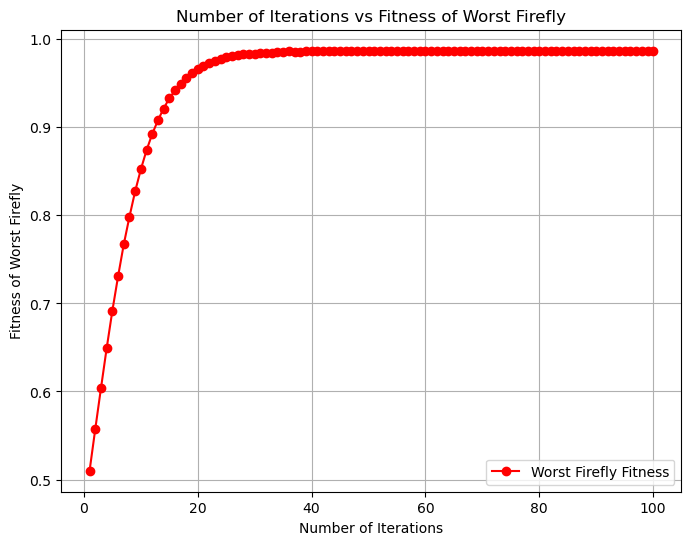

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of fireflies in the population
num_fireflies = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Firefly Optimization (FA) algorithm
def firefly_optimization(data, classifiers, num_fireflies):
    # Initialize the position of the fireflies randomly
    fireflies_positions = np.random.rand(num_fireflies, len(data))

    # Tracking lists for worst firefly metrics and fitness
    worst_firefly_accuracies = []
    worst_firefly_diversities = []
    worst_firefly_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform FA optimization
    num_iterations = 100
    beta_0 = 1.0  # Initial attractiveness
    alpha = 0.2    # Light absorption coefficient

    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Move fireflies towards better solutions
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if i != j:  # Exclude self-comparison
                    # Evaluate fitness of fireflies i and j
                    fitness_i = evaluate_fitness(fireflies_positions[i], data, classifiers)
                    fitness_j = evaluate_fitness(fireflies_positions[j], data, classifiers)

                    # Update position of firefly i based on attractiveness and distance
                    if fitness_i > fitness_j:
                        distance = np.linalg.norm(fireflies_positions[i] - fireflies_positions[j])
                        attractiveness = beta_0 * np.exp(-alpha * distance**2)
                        fireflies_positions[i] += attractiveness * (fireflies_positions[j] - fireflies_positions[i])

            # Ensure positions are within the bounds [0, 1]
            fireflies_positions[i] = np.clip(fireflies_positions[i], 0, 1)

            # Evaluate fitness of the updated firefly
            fitness = evaluate_fitness(fireflies_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the FA optimization code...

        # Calculate fitness for each firefly
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the firefly with the worst performance
        worst_firefly_index = np.argmin(fitness)
        worst_firefly_accuracy = accuracies[worst_firefly_index]
        worst_firefly_diversity = diversities[worst_firefly_index]

        # Append worst firefly metrics and fitness to tracking lists
        worst_firefly_accuracies.append(worst_firefly_accuracy)
        worst_firefly_diversities.append(worst_firefly_diversity)
        worst_firefly_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst firefly's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Firefly Accuracy: {worst_firefly_accuracy}")
            print(f"Worst Firefly Diversity: {worst_firefly_diversity}")
            print(f"Worst Firefly Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return fireflies_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses

# Evaluate the fitness of a firefly
def evaluate_fitness(position, data, classifiers):
    # Convert the position to indices for selecting data
    indices = np.round(position * (len(data) - 1)).astype(int)

    # Ensure that the selected indices cover at least two classes
    while len(np.unique(data[indices, -1])) < 2:
        indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

    X_train, y_train = data[indices, :-1], data[indices, -1]

    ensemble_preds = np.empty((len(X_train), len(classifiers)))

    # Train and predict with each classifier using 5-fold cross-validation
    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
        model.fit(X_train, y_train)
        preds = model.predict(X_train)
        ensemble_preds[:, idx] = preds

    # Calculate diversity as Hamming distance between classifiers' predictions
    diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

    # Calculate accuracy
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
    accuracy = accuracy_score(y_train, ensemble_preds_majority)

    return accuracy, diversity

# Perform FA optimization to get the optimal positions and tracking lists
optimal_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses = firefly_optimization(data, classifiers, num_fireflies)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst firefly
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_firefly_fitnesses_padded = worst_firefly_fitnesses[:num_iterations] + [worst_firefly_fitnesses[-1]] * (num_iterations - len(worst_firefly_fitnesses))
plt.plot(iterations_range, worst_firefly_fitnesses_padded, marker='o', color='r', label='Worst Firefly Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Firefly')
plt.title('Number of Iterations vs Fitness of Worst Firefly')
plt.legend()
plt.grid(True)
plt.show()


# PSO with 10 bags 

Iteration 20:
Best Particle Accuracy: 0.9964850615114236
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9746390286659731

Iteration 40:
Best Particle Accuracy: 0.9964850615114236
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9952158846541123

Iteration 60:
Best Particle Accuracy: 0.9964850615114236
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9957750087956457

Iteration 80:
Best Particle Accuracy: 0.9964850615114236
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9957819463199383

Iteration 100:
Best Particle Accuracy: 0.9964850615114236
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9957820715063802

Evaluation Metrics for Ensemble Predictions from PSO:
Accuracy: 0.9736842105263158
AUC: 0.9651162790697674
Sensitivity (Recall): 0.9302325581395349
Specificity: 1.0
Precision

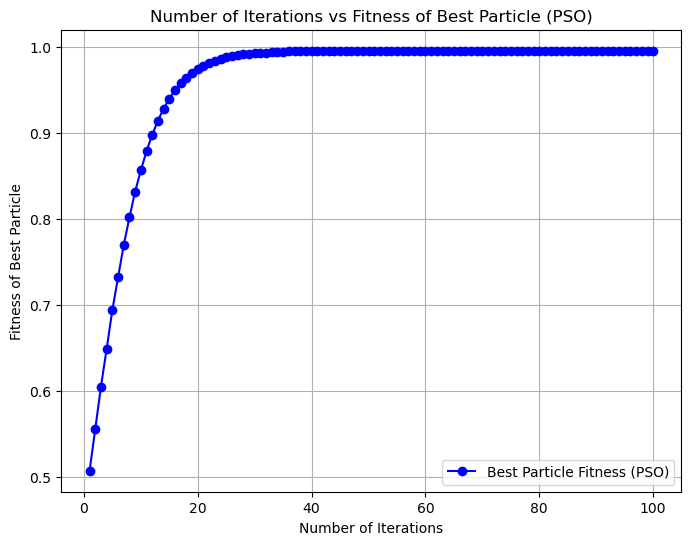

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of particles in the swarm
num_particles = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Particle Swarm Optimization (PSO) algorithm
def pso_optimization(data, classifiers, num_particles):
    # Initialize particle positions and velocities
    particles_positions = np.random.rand(num_particles, len(data))
    particles_velocities = np.random.rand(num_particles, len(data))

    # Tracking lists for best particle metrics and fitness
    best_particle_accuracies = []
    best_particle_diversities = []
    best_particle_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Set inertia weight and acceleration constants
    inertia_weight = 0.5
    acceleration_const1 = 2.0
    acceleration_const2 = 2.0

    # Perform PSO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Update particle positions and velocities
        particles_velocities = inertia_weight * particles_velocities + \
                               acceleration_const1 * np.random.rand() * (particles_positions - particles_positions) + \
                               acceleration_const2 * np.random.rand() * (particles_positions - particles_positions)

        particles_positions = particles_positions + particles_velocities

        # Clip the positions and velocities to be within the bounds [0, 1]
        particles_positions = np.clip(particles_positions, 0, 1)
        particles_velocities = np.clip(particles_velocities, -1, 1)

        # Particles construct solutions (positions) based on pheromone information
        for particle_position in particles_positions:
            # Convert the position to indices for selecting data
            particle_indices = np.round(particle_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[particle_indices, -1])) < 2:
                particle_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_particle, y_train_particle = data[particle_indices, :-1], data[particle_indices, -1]

            ensemble_preds = np.empty((len(X_train_particle), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_particle, y_train_particle)
                preds = model.predict(X_train_particle)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_particle, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each particle
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the best particle
        best_particle_index = np.argmax(fitness)
        best_particle_accuracy = accuracies[best_particle_index]
        best_particle_diversity = diversities[best_particle_index]

        # Append best particle metrics and fitness to tracking lists
        best_particle_accuracies.append(best_particle_accuracy)
        best_particle_diversities.append(best_particle_diversity)
        best_particle_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on best particle's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Particle Accuracy: {best_particle_accuracy}")
            print(f"Best Particle Diversity (Hamming Distance): {best_particle_diversity}")
            print(f"Best Particle Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return particles_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses

# Perform PSO optimization to get the optimal positions and tracking lists
optimal_positions_pso, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses = pso_optimization(data, classifiers, num_particles)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds_pso = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position_pso = optimal_positions_pso[idx]

    # Convert the position to indices for selecting data
    optimal_indices_pso = (np.round(optimal_position_pso * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices_pso], y[optimal_indices_pso])

    # Make predictions on the testing data using the trained classifier
    probs_pso = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds_pso array
    ensemble_preds_pso[:, idx] = probs_pso[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority_pso = np.mean(ensemble_preds_pso, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority_pso = (ensemble_preds_majority_pso >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions from PSO
accuracy_pso = accuracy_score(y_test, ensemble_preds_majority_pso)
auc_pso = roc_auc_score(y_test, ensemble_preds_majority_pso)
sensitivity_pso = recall_score(y_test, ensemble_preds_majority_pso)
specificity_pso = recall_score(y_test, ensemble_preds_majority_pso, pos_label=0)  # Calculate recall for the negative class (0)
precision_pso = precision_score(y_test, ensemble_preds_majority_pso)
f1_measure_pso = f1_score(y_test, ensemble_preds_majority_pso)

# Calculate G-measure for PSO
g_measure_pso = np.sqrt(sensitivity_pso * specificity_pso)

# Print evaluation metrics for the ensemble predictions from PSO
print("Evaluation Metrics for Ensemble Predictions from PSO:")
print("Accuracy:", accuracy_pso)
print("AUC:", auc_pso)
print("Sensitivity (Recall):", sensitivity_pso)
print("Specificity:", specificity_pso)
print("Precision:", precision_pso)
print("F1 Score:", f1_measure_pso)
print("G-measure:", g_measure_pso)

# Line plot for number of iterations vs fitness of best particle
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
best_particle_fitnesses_padded = best_particle_fitnesses[:num_iterations] + [best_particle_fitnesses[-1]] * (num_iterations - len(best_particle_fitnesses))
plt.plot(iterations_range, best_particle_fitnesses_padded, marker='o', color='b', label='Best Particle Fitness (PSO)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Particle')
plt.title('Number of Iterations vs Fitness of Best Particle (PSO)')
plt.legend()
plt.grid(True)
plt.show()


# PSO with 5 bags 

Iteration 20:
Best Particle Accuracy: 0.9947275922671354
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9745972514975473

Iteration 40:
Best Particle Accuracy: 0.9947275922671354
Best Particle Diversity (Hamming Distance): 0.008787346221441126
Best Particle Fitness: 0.9953898083928162

Iteration 60:
Best Particle Accuracy: 0.9947275922671354
Best Particle Diversity (Hamming Distance): 0.008787346221441126
Best Particle Fitness: 0.9957749821734709

Iteration 80:
Best Particle Accuracy: 0.9947275922671354
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9957819459304693

Iteration 100:
Best Particle Accuracy: 0.9947275922671354
Best Particle Diversity (Hamming Distance): 0.019332161687170474
Best Particle Fitness: 0.9957820715043099

Evaluation Metrics for Ensemble Predictions from PSO:
Accuracy: 0.9649122807017544
AUC: 0.9534883720930232
Sensitivity (Recall): 0.9069767441860465
Specificity: 1.0
Precision

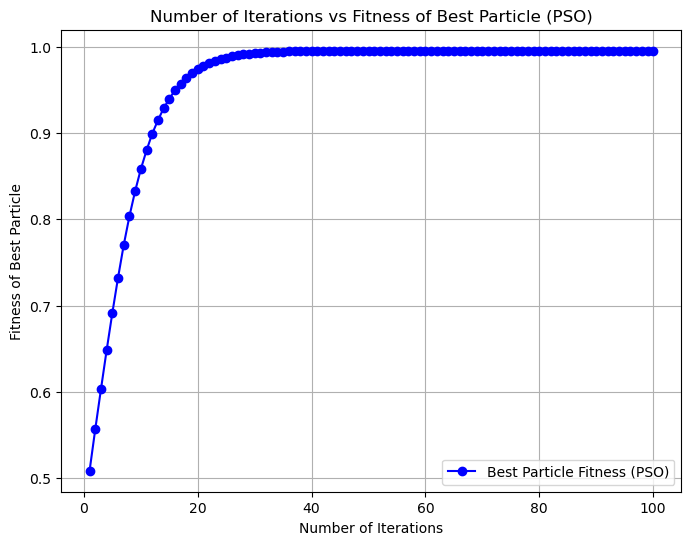

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of particles in the swarm
num_particles = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Particle Swarm Optimization (PSO) algorithm
def pso_optimization(data, classifiers, num_particles):
    # Initialize particle positions and velocities
    particles_positions = np.random.rand(num_particles, len(data))
    particles_velocities = np.random.rand(num_particles, len(data))

    # Tracking lists for best particle metrics and fitness
    best_particle_accuracies = []
    best_particle_diversities = []
    best_particle_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Set inertia weight and acceleration constants
    inertia_weight = 0.5
    acceleration_const1 = 2.0
    acceleration_const2 = 2.0

    # Perform PSO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Update particle positions and velocities
        particles_velocities = inertia_weight * particles_velocities + \
                               acceleration_const1 * np.random.rand() * (particles_positions - particles_positions) + \
                               acceleration_const2 * np.random.rand() * (particles_positions - particles_positions)

        particles_positions = particles_positions + particles_velocities

        # Clip the positions and velocities to be within the bounds [0, 1]
        particles_positions = np.clip(particles_positions, 0, 1)
        particles_velocities = np.clip(particles_velocities, -1, 1)

        # Particles construct solutions (positions) based on pheromone information
        for particle_position in particles_positions:
            # Convert the position to indices for selecting data
            particle_indices = np.round(particle_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[particle_indices, -1])) < 2:
                particle_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_particle, y_train_particle = data[particle_indices, :-1], data[particle_indices, -1]

            ensemble_preds = np.empty((len(X_train_particle), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_particle, y_train_particle)
                preds = model.predict(X_train_particle)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_particle, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each particle
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the best particle
        best_particle_index = np.argmax(fitness)
        best_particle_accuracy = accuracies[best_particle_index]
        best_particle_diversity = diversities[best_particle_index]

        # Append best particle metrics and fitness to tracking lists
        best_particle_accuracies.append(best_particle_accuracy)
        best_particle_diversities.append(best_particle_diversity)
        best_particle_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on best particle's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Particle Accuracy: {best_particle_accuracy}")
            print(f"Best Particle Diversity (Hamming Distance): {best_particle_diversity}")
            print(f"Best Particle Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return particles_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses

# Perform PSO optimization to get the optimal positions and tracking lists
optimal_positions_pso, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses = pso_optimization(data, classifiers, num_particles)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds_pso = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position_pso = optimal_positions_pso[idx]

    # Convert the position to indices for selecting data
    optimal_indices_pso = (np.round(optimal_position_pso * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices_pso], y[optimal_indices_pso])

    # Make predictions on the testing data using the trained classifier
    probs_pso = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds_pso array
    ensemble_preds_pso[:, idx] = probs_pso[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority_pso = np.mean(ensemble_preds_pso, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority_pso = (ensemble_preds_majority_pso >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions from PSO
accuracy_pso = accuracy_score(y_test, ensemble_preds_majority_pso)
auc_pso = roc_auc_score(y_test, ensemble_preds_majority_pso)
sensitivity_pso = recall_score(y_test, ensemble_preds_majority_pso)
specificity_pso = recall_score(y_test, ensemble_preds_majority_pso, pos_label=0)  # Calculate recall for the negative class (0)
precision_pso = precision_score(y_test, ensemble_preds_majority_pso)
f1_measure_pso = f1_score(y_test, ensemble_preds_majority_pso)

# Calculate G-measure for PSO
g_measure_pso = np.sqrt(sensitivity_pso * specificity_pso)

# Print evaluation metrics for the ensemble predictions from PSO
print("Evaluation Metrics for Ensemble Predictions from PSO:")
print("Accuracy:", accuracy_pso)
print("AUC:", auc_pso)
print("Sensitivity (Recall):", sensitivity_pso)
print("Specificity:", specificity_pso)
print("Precision:", precision_pso)
print("F1 Score:", f1_measure_pso)
print("G-measure:", g_measure_pso)

# Line plot for number of iterations vs fitness of best particle
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
best_particle_fitnesses_padded = best_particle_fitnesses[:num_iterations] + [best_particle_fitnesses[-1]] * (num_iterations - len(best_particle_fitnesses))
plt.plot(iterations_range, best_particle_fitnesses_padded, marker='o', color='b', label='Best Particle Fitness (PSO)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Particle')
plt.title('Number of Iterations vs Fitness of Best Particle (PSO)')
plt.legend()
plt.grid(True)
plt.show()


# firefly 10 bags 

Iteration 20:
Worst Firefly Accuracy: 0.9859402460456942
Worst Firefly Diversity: 0.033391915641476276
Worst Firefly Fitness: 0.9656842020875442

Iteration 40:
Worst Firefly Accuracy: 0.9859402460456942
Worst Firefly Diversity: 0.033391915641476276
Worst Firefly Fitness: 0.9859112550583419

Iteration 60:
Worst Firefly Accuracy: 0.9859402460456942
Worst Firefly Diversity: 0.033391915641476276
Worst Firefly Fitness: 0.9862848612317119

Iteration 80:
Worst Firefly Accuracy: 0.9859402460456942
Worst Firefly Diversity: 0.033391915641476276
Worst Firefly Fitness: 0.9862916155394426

Iteration 100:
Worst Firefly Accuracy: 0.9859402460456942
Worst Firefly Diversity: 0.033391915641476276
Worst Firefly Fitness: 0.9862917376464285

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9912280701754386
AUC: 0.9883720930232558
Sensitivity (Recall): 0.9767441860465116
Specificity: 1.0
Precision: 1.0
F1 Score: 0.988235294117647
G-measure: 0.9883036912035246


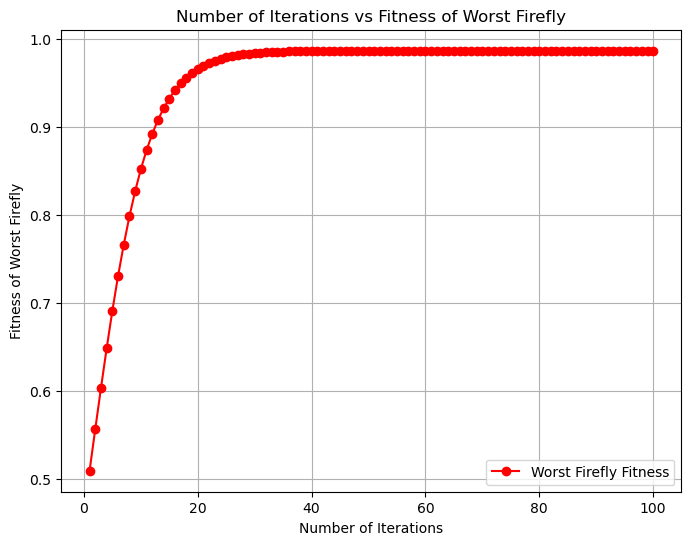

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of fireflies in the population
num_fireflies = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Firefly Optimization (FA) algorithm
def firefly_optimization(data, classifiers, num_fireflies):
    # Initialize the position of the fireflies randomly
    fireflies_positions = np.random.rand(num_fireflies, len(data))

    # Tracking lists for worst firefly metrics and fitness
    worst_firefly_accuracies = []
    worst_firefly_diversities = []
    worst_firefly_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform FA optimization
    num_iterations = 100
    beta_0 = 1.0  # Initial attractiveness
    alpha = 0.2    # Light absorption coefficient

    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Move fireflies towards better solutions
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if i != j:  # Exclude self-comparison
                    # Evaluate fitness of fireflies i and j
                    fitness_i = evaluate_fitness(fireflies_positions[i], data, classifiers)
                    fitness_j = evaluate_fitness(fireflies_positions[j], data, classifiers)

                    # Update position of firefly i based on attractiveness and distance
                    if fitness_i > fitness_j:
                        distance = np.linalg.norm(fireflies_positions[i] - fireflies_positions[j])
                        attractiveness = beta_0 * np.exp(-alpha * distance**2)
                        fireflies_positions[i] += attractiveness * (fireflies_positions[j] - fireflies_positions[i])

            # Ensure positions are within the bounds [0, 1]
            fireflies_positions[i] = np.clip(fireflies_positions[i], 0, 1)

            # Evaluate fitness of the updated firefly
            fitness = evaluate_fitness(fireflies_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the FA optimization code...

        # Calculate fitness for each firefly
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the firefly with the worst performance
        worst_firefly_index = np.argmin(fitness)
        worst_firefly_accuracy = accuracies[worst_firefly_index]
        worst_firefly_diversity = diversities[worst_firefly_index]

        # Append worst firefly metrics and fitness to tracking lists
        worst_firefly_accuracies.append(worst_firefly_accuracy)
        worst_firefly_diversities.append(worst_firefly_diversity)
        worst_firefly_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst firefly's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Firefly Accuracy: {worst_firefly_accuracy}")
            print(f"Worst Firefly Diversity: {worst_firefly_diversity}")
            print(f"Worst Firefly Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return fireflies_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses

# Evaluate the fitness of a firefly
def evaluate_fitness(position, data, classifiers):
    # Convert the position to indices for selecting data
    indices = np.round(position * (len(data) - 1)).astype(int)

    # Ensure that the selected indices cover at least two classes
    while len(np.unique(data[indices, -1])) < 2:
        indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

    X_train, y_train = data[indices, :-1], data[indices, -1]

    ensemble_preds = np.empty((len(X_train), len(classifiers)))

    # Train and predict with each classifier using 5-fold cross-validation
    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
        model.fit(X_train, y_train)
        preds = model.predict(X_train)
        ensemble_preds[:, idx] = preds

    # Calculate diversity as Hamming distance between classifiers' predictions
    diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

    # Calculate accuracy
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
    accuracy = accuracy_score(y_train, ensemble_preds_majority)

    return accuracy, diversity

# Perform FA optimization to get the optimal positions and tracking lists
optimal_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses = firefly_optimization(data, classifiers, num_fireflies)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst firefly
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_firefly_fitnesses_padded = worst_firefly_fitnesses[:num_iterations] + [worst_firefly_fitnesses[-1]] * (num_iterations - len(worst_firefly_fitnesses))
plt.plot(iterations_range, worst_firefly_fitnesses_padded, marker='o', color='r', label='Worst Firefly Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Firefly')
plt.title('Number of Iterations vs Fitness of Worst Firefly')
plt.legend()
plt.grid(True)
plt.show()


# 10 bags 

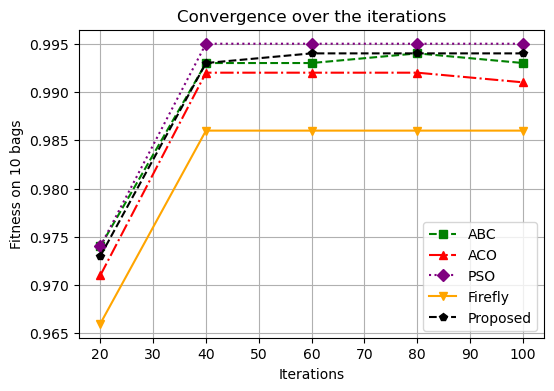

In [2]:
import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]


abc_values = [0.974, 0.993, 0.993, 0.994, 0.993]
aco_values = [0.971, 0.992, 0.992, 0.992, 0.991]
pso_values = [0.974, 0.995, 0.995, 0.995, 0.995]
firefly_values = [0.966, 0.986, 0.986, 0.986, 0.986]
proposed_values = [0.973, 0.993, 0.994, 0.994, 0.994]

# Plotting with different line types and visual effects
plt.figure(figsize=(6, 4))


plt.plot(iterations, abc_values, marker='s', linestyle='--', color='g', label='ABC')
plt.plot(iterations, aco_values, marker='^', linestyle='-.', color='r', label='ACO')
plt.plot(iterations, pso_values, marker='D', linestyle=':', color='purple', label='PSO')
plt.plot(iterations, firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
plt.plot(iterations, proposed_values, marker='p', linestyle='--', color='black', label='Proposed')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness on 10 bags')
plt.title('Convergence over the iterations')
plt.legend()
plt.grid(True)
plt.show()


# 5 bags 

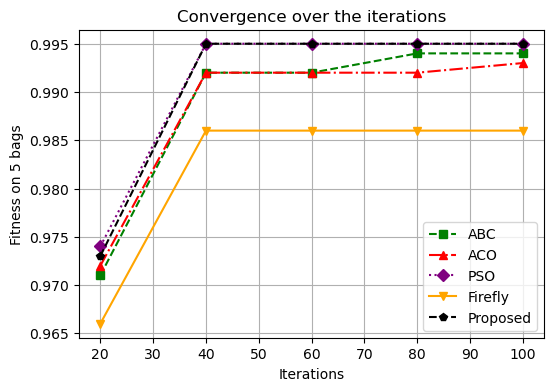

In [4]:
import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]


abc_values = [0.971, 0.992, 0.992, 0.994, 0.994]
aco_values = [0.972, 0.992, 0.992, 0.992, 0.993]
pso_values = [0.974, 0.995, 0.995, 0.995, 0.995]
firefly_values = [0.966, 0.986, 0.986, 0.986, 0.986]
proposed_values = [0.973, 0.995, 0.995, 0.995, 0.995]

# Plotting with different line types and visual effects
plt.figure(figsize=(6, 4))


plt.plot(iterations, abc_values, marker='s', linestyle='--', color='g', label='ABC')
plt.plot(iterations, aco_values, marker='^', linestyle='-.', color='r', label='ACO')
plt.plot(iterations, pso_values, marker='D', linestyle=':', color='purple', label='PSO')
plt.plot(iterations, firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
plt.plot(iterations, proposed_values, marker='p', linestyle='--', color='black', label='Proposed')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness on 5 bags')
plt.title('Convergence over the iterations')
plt.legend()
plt.grid(True)
plt.show()


Iteration 20:
Worst Bag Accuracy: 0.9973404255319149
Worst Bag Diversity (Hamming Distance): 0.013297872340425532
Worst Bag Fitness: 0.9739264362211905
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Worst Bag Accuracy: 0.9946236559139785
Worst Bag Diversity (Hamming Distance): 0.017921146953405017
Worst Bag Fitness: 0.9936352133163712
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.029239766081871343
Worst Bag Fitness: 0.9942698344483835
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.017902813299232736
Worst Bag Fitness: 0.9942767301657927
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Worst Bag Accuracy: 0.9963235294117647
Worst Bag Diversity (Hamming Distance): 0.02022058823529412


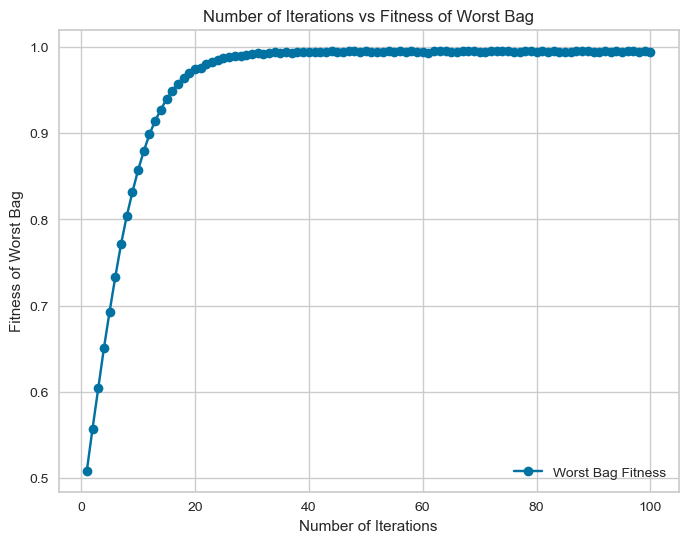

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")           
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#hamming worst 5 bags

Iteration 20:
Worst Bag Accuracy: 0.9935897435897436
Worst Bag Diversity (Hamming Distance): 0.021367521367521368
Worst Bag Fitness: 0.9735913530314564
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.008982035928143712
Worst Bag Fitness: 0.9955141670834012
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Worst Bag Accuracy: 0.998003992015968
Worst Bag Diversity (Hamming Distance): 0.023952095808383235
Worst Bag Fitness: 0.9954973693565237
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.013307984790874524
Worst Bag Fitness: 0.9959034595526015
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Hamming Distance): 0.028662420382165606
Worst Bag Fitne

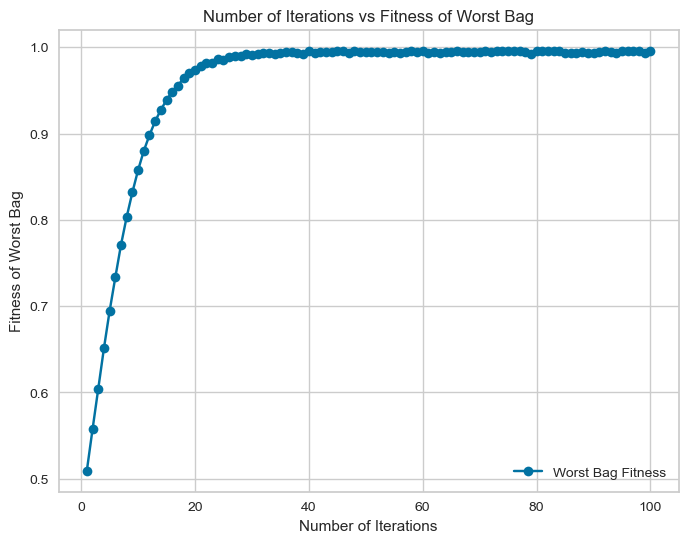

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")           
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Hamming best 10 bags

Iteration 20:
Best Bag Accuracy: 0.995
Best Bag Diversity (Hamming Distance): 0.0175
Best Bag Fitness: 0.9734189884213877
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Best Bag Accuracy: 1.0
Best Bag Diversity (Hamming Distance): 0.018867924528301886
Best Bag Fitness: 0.9944645591125342
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Best Bag Accuracy: 0.9981447124304267
Best Bag Diversity (Hamming Distance): 0.0055658627087198514
Best Bag Fitness: 0.9946578675264063
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Best Bag Accuracy: 0.9953051643192489
Best Bag Diversity (Hamming Distance): 0.03286384976525822
Best Bag Fitness: 0.9943807765784767
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Best Bag Accuracy: 0.9966887417218543
Best Bag Diversity (Hamming Distance): 0.033112582781456956
Best Bag Fitness: 0.99451

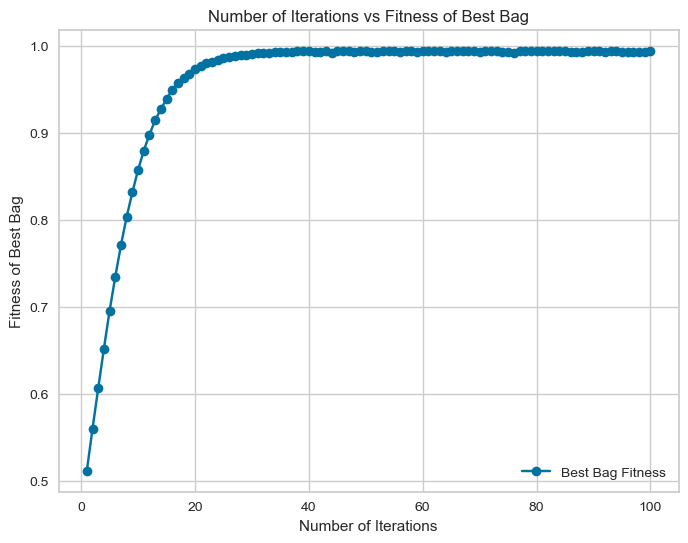

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Hamming Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}") 
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()



In [22]:
#BEST BAG (5) HAMMING 

Iteration 20:
Best Bag Accuracy: 0.9940298507462687
Best Bag Diversity (Hamming Distance): 0.03283582089552239
Best Bag Fitness: 0.9745205263924355
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Best Bag Accuracy: 0.9887218045112782
Best Bag Diversity (Hamming Distance): 0.043233082706766915
Best Bag Fitness: 0.9945851754193173
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Best Bag Accuracy: 0.9937106918238994
Best Bag Diversity (Hamming Distance): 0.018867924528301886
Best Bag Fitness: 0.9950576462425789
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Best Bag Accuracy: 0.9872029250457038
Best Bag Diversity (Hamming Distance): 0.04021937842778794
Best Bag Fitness: 0.9948194228993061
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Best Bag Accuracy: 0.9959677419354839
Best Bag Diversity (Hamming Distance): 0.0201

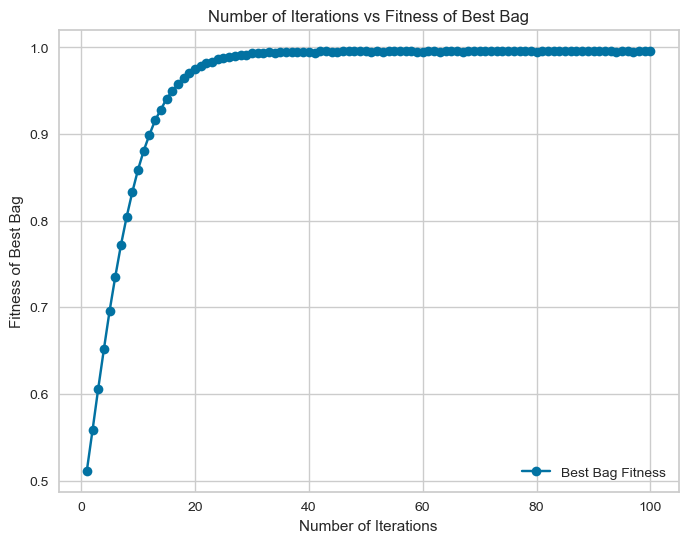

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Hamming Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}") 
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
#BHATTACHARYA WORST 10 

Iteration 20:
Worst Bag Accuracy: 0.9941060903732809
Worst Bag Diversity (Bhattacharyya Distance): 0.12480835802168404
Worst Bag Fitness: 0.9079674412860617
Accuracy Weight: 0.9174389747697415
Diversity Weight: 0.08256102523025848


Iteration 40:
Worst Bag Accuracy: 0.9973958333333334
Worst Bag Diversity (Bhattacharyya Distance): nan
Worst Bag Fitness: nan
Accuracy Weight: 0.6905480615036319
Diversity Weight: 0.3094519384963681


Iteration 60:
Worst Bag Accuracy: 0.998211091234347
Worst Bag Diversity (Bhattacharyya Distance): 0.26432359965966246
Worst Bag Fitness: 0.5945729708682708
Accuracy Weight: 0.5000000000000002
Diversity Weight: 0.4999999999999998


Iteration 80:
Worst Bag Accuracy: 0.9973958333333334
Worst Bag Diversity (Bhattacharyya Distance): nan
Worst Bag Fitness: nan
Accuracy Weight: 0.6905480615036319
Diversity Weight: 0.309451938496368


Iteration 100:
Worst Bag Accuracy: 0.9973958333333334
Worst Bag Diversity (Bhattacharyya Distance): nan
Worst Bag Fitness: nan
Accuracy

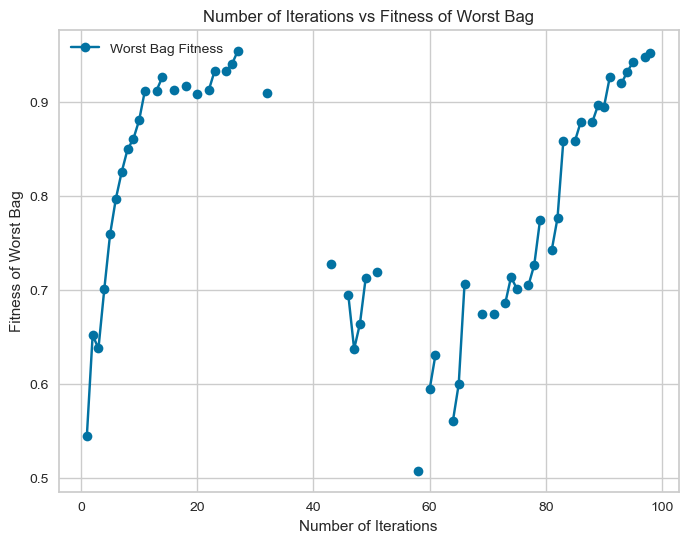

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitnesses)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(worst_bag_accuracy)
        best_bag_diversities.append(worst_bag_diversity)
        best_bag_fitnesses.append(fitnesses[worst_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = bhattacharyya_distance(ensemble_preds_new_bag[:, 1:], ensemble_preds_new_bag[:, :-1])
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[worst_bag_index]:
            bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitnesses[worst_bag_index]}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}") 
            print()
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
#Bhattacharya 5 wosrt bags 

Iteration 20:
Worst Bag Accuracy: 0.9929824561403509
Worst Bag Diversity (Bhattacharyya Distance): 0.2744144440315735
Worst Bag Fitness: 0.9774540649791028
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517


Iteration 40:
Worst Bag Accuracy: 0.9973474801061007
Worst Bag Diversity (Bhattacharyya Distance): 0.45664335690719493
Worst Bag Fitness: 0.9971317406838012
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931


Iteration 60:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhattacharyya Distance): 0.06273937583693477
Worst Bag Fitness: 0.999993239218943
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06


Iteration 80:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhattacharyya Distance): 0.4342262909691284
Worst Bag Fitness: 0.9999999262471472
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07


Iteration 100:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhattacharyya Distance): 0.511525

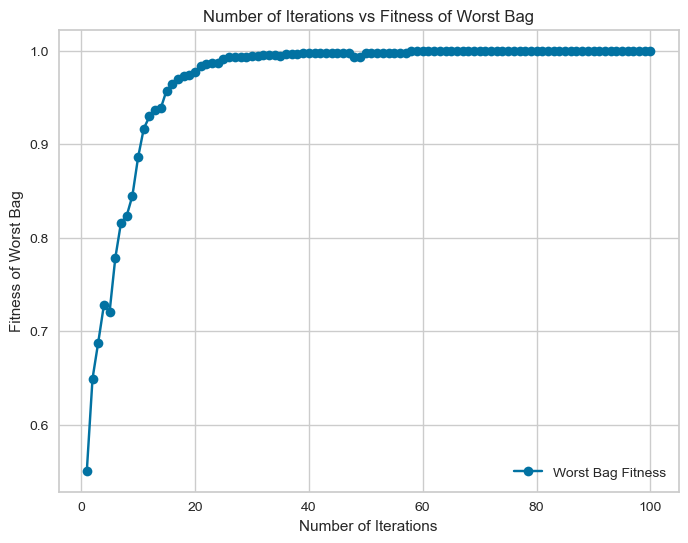

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitnesses)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(worst_bag_accuracy)
        best_bag_diversities.append(worst_bag_diversity)
        best_bag_fitnesses.append(fitnesses[worst_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = bhattacharyya_distance(ensemble_preds_new_bag[:, 1:], ensemble_preds_new_bag[:, :-1])
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[worst_bag_index]:
            bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitnesses[worst_bag_index]}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}") 
            print()
            

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


Iteration 20:
best Bag Accuracy: 0.9955357142857143
best Bag Diversity (Bhattacharyya Distance): 0.42651557975335447
best Bag Fitness: nan
Accuracy Weight: 0.017750809579360517
Diversity Weight: 0.9822491904206394

Iteration 40:
best Bag Accuracy: 0.994059405940594
best Bag Diversity (Bhattacharyya Distance): 0.24668107254171745
best Bag Fitness: nan
Accuracy Weight: 0.0003264759252776931
Diversity Weight: 0.9996735240747223

Iteration 60:
best Bag Accuracy: 0.9949622166246851
best Bag Diversity (Bhattacharyya Distance): 0.43865918165759943
best Bag Fitness: nan
Accuracy Weight: 5.901832691674817e-06
Diversity Weight: 0.9999940981673082

Iteration 80:
best Bag Accuracy: 0.9962894248608535
best Bag Diversity (Bhattacharyya Distance): 0.44948158762889806
best Bag Fitness: nan
Accuracy Weight: 1.0665614837916577e-07
Diversity Weight: 0.9999998933438515

Iteration 100:
best Bag Accuracy: 0.9799554565701559
best Bag Diversity (Bhattacharyya Distance): 0.07073621266732999
best Bag Fitness: n

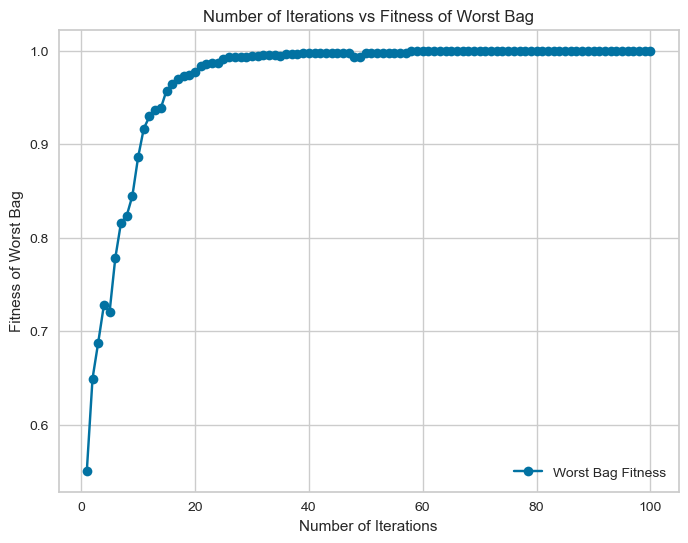

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"best Bag Accuracy: {best_bag_accuracy}")
            print(f"best Bag Diversity (Bhattacharyya Distance): {best_bag_diversity}")
            print(f"best Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}") 
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)


# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
#Q statistics worst 10

Iteration 20:
best Bag Accuracy: 0.9921465968586387
best Bag Q-statistics: 0.7425440956334659
best Bag Fitness: 0.9868003147575907
Accuracy Weight: 0.9822491904206394
Q-statistics Weight: 0.017750809579360517

Iteration 40:
best Bag Accuracy: 0.9946428571428572
best Bag Q-statistics: 0.9316519054743013
best Bag Fitness: 0.993095488891542
Accuracy Weight: 0.9996735240747223
Q-statistics Weight: 0.0003264759252776931

Iteration 60:
best Bag Accuracy: 0.9978118161925602
best Bag Q-statistics: 0.6085201656298629
best Bag Fitness: 0.9940905981037221
Accuracy Weight: 0.9999940981673082
Q-statistics Weight: 5.901832691674817e-06

Iteration 80:
best Bag Accuracy: 0.9954337899543378
best Bag Q-statistics: 0.5832223986568779
best Bag Fitness: 0.9938514732348058
Accuracy Weight: 0.9999998933438515
Q-statistics Weight: 1.0665614837916577e-07

Iteration 100:
best Bag Accuracy: 1.0
best Bag Q-statistics: 0.6220707069454422
best Bag Fitness: 0.9945485170952205
Accuracy Weight: 0.9999999980725531
Q-st

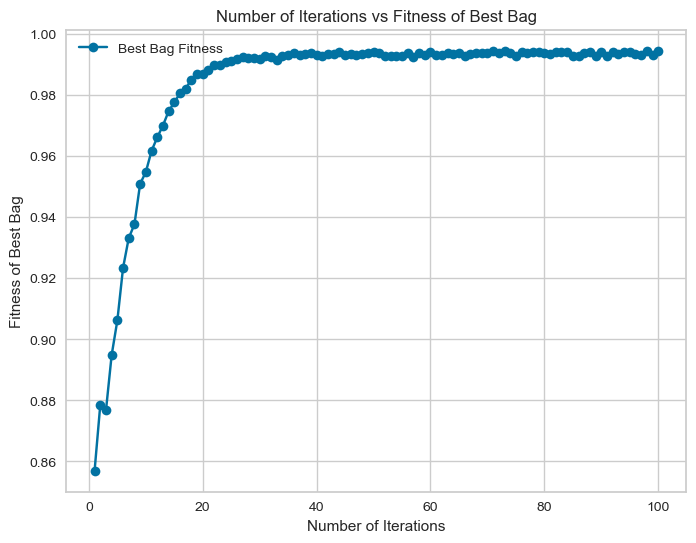

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = len(np.unique(np.concatenate([predictions1, predictions2])))
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        matrix1[int(predictions1[i]), int(predictions2[i])] += 1
        matrix2[int(predictions2[i]), int(predictions1[i])] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat



# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = predictions1.shape[1]
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        idx1 = np.argmax(predictions1[i])
        idx2 = np.argmax(predictions2[i])
        matrix1[idx1, idx2] += 1
        matrix2[idx2, idx1] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_q_stat = 0.5

    # Tracking lists for worst bag metrics and fitness
    best_bag_accuracies = []
    best_bag_q_stats = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        q_statistics_list = []  # To store Q-statistics for each bag

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict_proba(X_train_bag)
                ensemble_preds[:, idx] = preds[:, 1]  # Store only class probabilities for class 1

            # Calculate Q-statistics as a measure of classifier disagreement
            q_stat = q_statistics(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            q_statistics_list.append(q_stat)

        # ... Rest of the code remains the same ...



        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(q_statistics_list) * w_q_stat

        # Identify the bag with the worst performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_q_stat = q_statistics_list[best_bag_index]

        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_q_stats.append(best_bag_q_stat)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and Q-statistics
        if np.mean(accuracies) > np.mean(q_statistics_list):
            w_acc *= 1.1  # Increase weight for accuracy
            w_q_stat *= 0.9  # Decrease weight for Q-statistics
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_q_stat *= 1.1  # Increase weight for Q-statistics

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_q_stat
        w_acc /= total_weight
        w_q_stat /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"best Bag Accuracy: {best_bag_accuracy}")
            print(f"best Bag Q-statistics: {best_bag_q_stat}")
            print(f"best Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Q-statistics Weight: {w_q_stat}") 
            print()

    return bags, best_bag_accuracies, best_bag_q_stats, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_q_stats, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# ... Rest of the code for evaluation and plotting remains the same ...

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100  # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
#Q statistics 5 bags

Iteration 20:
best Bag Accuracy: 0.9980842911877394
best Bag Q-statistics: 0.5465683100864012
best Bag Fitness: 0.9891278537516102
Accuracy Weight: 0.9822491904206394
Q-statistics Weight: 0.017750809579360517

Iteration 40:
best Bag Accuracy: 1.0
best Bag Q-statistics: 0.6160596149681261
best Bag Fitness: 0.9978136623451275
Accuracy Weight: 0.9996735240747223
Q-statistics Weight: 0.0003264759252776931

Iteration 60:
best Bag Accuracy: 0.9839142091152815
best Bag Q-statistics: 0.6941017808583949
best Bag Fitness: 0.99438164714974
Accuracy Weight: 0.9999940981673082
Q-statistics Weight: 5.901832691674817e-06

Iteration 80:
best Bag Accuracy: 0.9932735426008968
best Bag Q-statistics: 0.5730926706318575
best Bag Fitness: 0.9966190056560341
Accuracy Weight: 0.9999998933438515
Q-statistics Weight: 1.0665614837916577e-07

Iteration 100:
best Bag Accuracy: 0.9979166666666667
best Bag Q-statistics: 0.589987623459052
best Bag Fitness: 0.99718470333809
Accuracy Weight: 0.9999999980725531
Q-statis

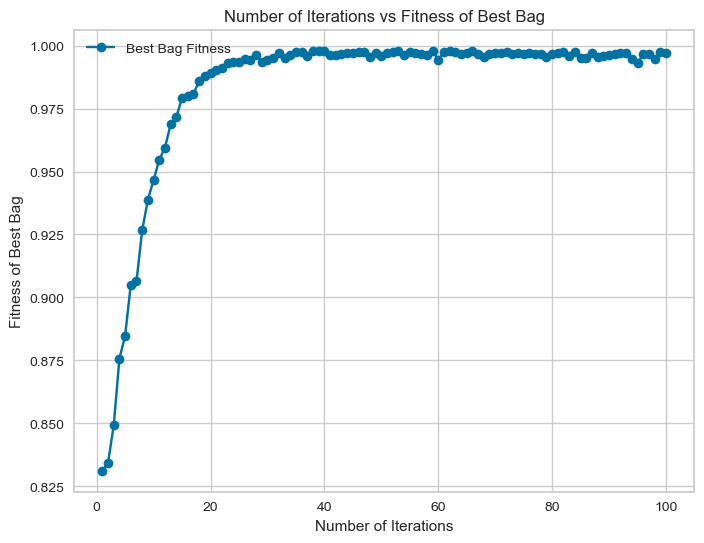

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = len(np.unique(np.concatenate([predictions1, predictions2])))
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        matrix1[int(predictions1[i]), int(predictions2[i])] += 1
        matrix2[int(predictions2[i]), int(predictions1[i])] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat



# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = predictions1.shape[1]
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        idx1 = np.argmax(predictions1[i])
        idx2 = np.argmax(predictions2[i])
        matrix1[idx1, idx2] += 1
        matrix2[idx2, idx1] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_q_stat = 0.5

    # Tracking lists for worst bag metrics and fitness
    best_bag_accuracies = []
    best_bag_q_stats = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        q_statistics_list = []  # To store Q-statistics for each bag

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict_proba(X_train_bag)
                ensemble_preds[:, idx] = preds[:, 1]  # Store only class probabilities for class 1

            # Calculate Q-statistics as a measure of classifier disagreement
            q_stat = q_statistics(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            q_statistics_list.append(q_stat)

        # ... Rest of the code remains the same ...



        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(q_statistics_list) * w_q_stat

        # Identify the bag with the worst performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_q_stat = q_statistics_list[best_bag_index]

        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_q_stats.append(best_bag_q_stat)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and Q-statistics
        if np.mean(accuracies) > np.mean(q_statistics_list):
            w_acc *= 1.1  # Increase weight for accuracy
            w_q_stat *= 0.9  # Decrease weight for Q-statistics
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_q_stat *= 1.1  # Increase weight for Q-statistics

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_q_stat
        w_acc /= total_weight
        w_q_stat /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"best Bag Accuracy: {best_bag_accuracy}")
            print(f"best Bag Q-statistics: {best_bag_q_stat}")
            print(f"best Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Q-statistics Weight: {w_q_stat}") 
            print()

    return bags, best_bag_accuracies, best_bag_q_stats, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_q_stats, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# ... Rest of the code for evaluation and plotting remains the same ...

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100  # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
#WORST BAG FITNESS Q STATISTICS (10 bags) 

Iteration 20:
Worst Bag Accuracy: 1.0
Worst Bag Q-statistics: 0.7367980461827996
Worst Bag Fitness: 0.7222125311235887
Accuracy Weight: 0.018071595021380366
Q-statistics Weight: 1.0

Iteration 40:
Worst Bag Accuracy: 0.9977827050997783
Worst Bag Q-statistics: 0.7498311107129522
Worst Bag Fitness: 0.7319525926499703
Accuracy Weight: 0.00032658254661677963
Q-statistics Weight: 1.0

Iteration 60:
Worst Bag Accuracy: 1.0
Worst Bag Q-statistics: 0.5980762825561939
Worst Bag Fitness: 0.6838019818099169
Accuracy Weight: 5.901867523509515e-06
Q-statistics Weight: 1.0

Iteration 80:
Worst Bag Accuracy: 0.9965635738831615
Worst Bag Q-statistics: 0.7227565709393828
Worst Bag Fitness: 0.6967449749792393
Accuracy Weight: 1.0665615975470103e-07
Q-statistics Weight: 1.0

Iteration 100:
Worst Bag Accuracy: 0.9982174688057041
Worst Bag Q-statistics: 0.5746701532348748
Worst Bag Fitness: 0.7134606496124907
Accuracy Weight: 1.927446925622604e-09
Q-statistics Weight: 1.0

Evaluation Metrics for Ensemble P

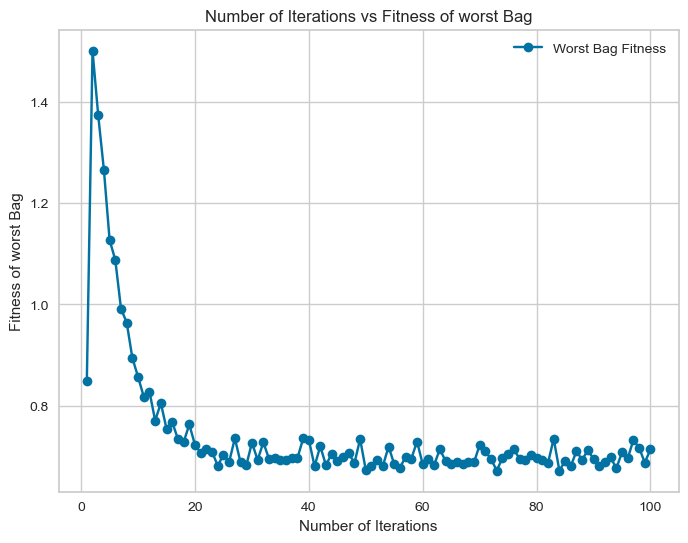

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = len(np.unique(np.concatenate([predictions1, predictions2])))
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        matrix1[int(predictions1[i]), int(predictions2[i])] += 1
        matrix2[int(predictions2[i]), int(predictions1[i])] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat



# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = predictions1.shape[1]
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        idx1 = np.argmax(predictions1[i])
        idx2 = np.argmax(predictions2[i])
        matrix1[idx1, idx2] += 1
        matrix2[idx2, idx1] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
# ... Previous code ...

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_q_stat = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_q_stats = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        q_statistics_list = []  # To store Q-statistics for each bag

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict_proba(X_train_bag)
                ensemble_preds[:, idx] = preds[:, 1]  # Store only class probabilities for class 1

            # Calculate Q-statistics as a measure of classifier disagreement
            q_stat = q_statistics(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            q_statistics_list.append(q_stat)

        # ... Rest of the code remains the same ...

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(q_statistics_list) * w_q_stat

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_q_stat = q_statistics_list[worst_bag_index]

        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_q_stats.append(worst_bag_q_stat)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and Q-statistics based on the worst bag
        if np.mean(accuracies) > np.mean(q_statistics_list):
            w_acc *= 0.9  # Decrease weight for accuracy
            w_q_stat *= 1.1  # Increase weight for Q-statistics
        else:
            w_acc *= 1.1  # Increase weight for accuracy
            w_q_stat *= 0.9  # Decrease weight for Q-statistics

        # Normalize the weights to ensure they sum up to 1
        max_weight = max(w_acc, w_q_stat)
        w_acc /= max_weight
        w_q_stat /= max_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Q-statistics: {worst_bag_q_stat}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Q-statistics Weight: {w_q_stat}") 
            print()

    return bags, worst_bag_accuracies, worst_bag_q_stats, worst_bag_fitnesses

# ... Rest of the code remains the same ...



# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_q_stats, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# ... Rest of the code for evaluation and plotting remains the same ...

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100  # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of worst Bag')
plt.title('Number of Iterations vs Fitness of worst Bag')
plt.legend()
plt.grid(True)
plt.show()


Iteration 20:
Worst Bag Accuracy: 0.9945750452079566
Worst Bag Q-statistics: 0.712720907405026
Worst Bag Fitness: 0.722799679808258
Accuracy Weight: 0.018071595021380366
Q-statistics Weight: 1.0

Iteration 40:
Worst Bag Accuracy: 1.0
Worst Bag Q-statistics: 0.6733140809363031
Worst Bag Fitness: 0.6514203140351151
Accuracy Weight: 0.00032658254661677963
Q-statistics Weight: 1.0

Iteration 60:
Worst Bag Accuracy: 0.9941002949852508
Worst Bag Q-statistics: 0.7246620531003424
Worst Bag Fitness: 0.7029724033182189
Accuracy Weight: 5.901867523509515e-06
Q-statistics Weight: 1.0

Iteration 80:
Worst Bag Accuracy: 0.9976359338061466
Worst Bag Q-statistics: 0.6365241140410809
Worst Bag Fitness: 0.6872773292934656
Accuracy Weight: 1.0665615975470103e-07
Q-statistics Weight: 1.0

Iteration 100:
Worst Bag Accuracy: 0.9942307692307693
Worst Bag Q-statistics: 0.5384289415961943
Worst Bag Fitness: 0.6659629898254282
Accuracy Weight: 1.927446925622604e-09
Q-statistics Weight: 1.0

Evaluation Metrics f

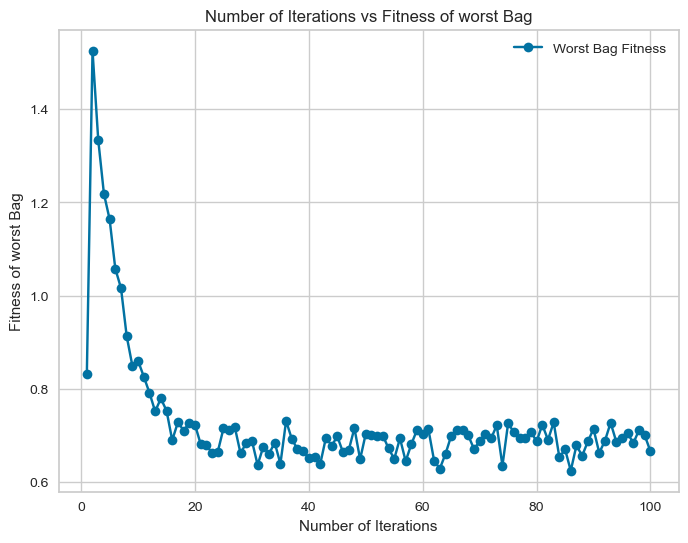

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = len(np.unique(np.concatenate([predictions1, predictions2])))
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        matrix1[int(predictions1[i]), int(predictions2[i])] += 1
        matrix2[int(predictions2[i]), int(predictions1[i])] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat



# Calculate Q-statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    num_classes = predictions1.shape[1]
    matrix1 = np.zeros((num_classes, num_classes))
    matrix2 = np.zeros((num_classes, num_classes))

    for i in range(len(predictions1)):
        idx1 = np.argmax(predictions1[i])
        idx2 = np.argmax(predictions2[i])
        matrix1[idx1, idx2] += 1
        matrix2[idx2, idx1] += 1

    matrix1 /= np.sum(matrix1)
    matrix2 /= np.sum(matrix2)

    q_stat = np.sum(np.sqrt(matrix1 * matrix2))
    return q_stat

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
# ... Previous code ...

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_q_stat = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_q_stats = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        q_statistics_list = []  # To store Q-statistics for each bag

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict_proba(X_train_bag)
                ensemble_preds[:, idx] = preds[:, 1]  # Store only class probabilities for class 1

            # Calculate Q-statistics as a measure of classifier disagreement
            q_stat = q_statistics(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            q_statistics_list.append(q_stat)

        # ... Rest of the code remains the same ...

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(q_statistics_list) * w_q_stat

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_q_stat = q_statistics_list[worst_bag_index]

        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_q_stats.append(worst_bag_q_stat)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and Q-statistics based on the worst bag
        if np.mean(accuracies) > np.mean(q_statistics_list):
            w_acc *= 0.9  # Decrease weight for accuracy
            w_q_stat *= 1.1  # Increase weight for Q-statistics
        else:
            w_acc *= 1.1  # Increase weight for accuracy
            w_q_stat *= 0.9  # Decrease weight for Q-statistics

        # Normalize the weights to ensure they sum up to 1
        max_weight = max(w_acc, w_q_stat)
        w_acc /= max_weight
        w_q_stat /= max_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Q-statistics: {worst_bag_q_stat}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Q-statistics Weight: {w_q_stat}") 
            print()

    return bags, worst_bag_accuracies, worst_bag_q_stats, worst_bag_fitnesses

# ... Rest of the code remains the same ...



# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_q_stats, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# ... Rest of the code for evaluation and plotting remains the same ...

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100  # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of worst Bag')
plt.title('Number of Iterations vs Fitness of worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [61]:
# Diversity as entropy measure 

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from scipy.stats import entropy
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'LR': {
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))
            entropies = np.zeros(len(classifiers))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

                # Calculate entropy for each classifier's predictions
                class_probabilities = np.mean(ensemble_preds[:, idx] == preds.reshape(-1, 1), axis=0)
                entropies[idx] = entropy(class_probabilities)

            # Calculate diversity as average entropy of classifiers' predictions
            diversity = np.mean(entropies)

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        max_weight = max(w_acc, w_q_stat)
        w_acc /= max_weight
        w_q_stat /= max_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Entropy): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Q-statistics Weight: {w_q_stat}") 
            print()
           

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100  # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


UnboundLocalError: local variable 'w_q_stat' referenced before assignment

Iteration 20:
best Bag Accuracy: 0.9895470383275261
best Bag Diversity (Bhattacharyya Distance): 0.1007838590269532
best Bag Fitness: 0.9771983855191639
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
best Bag Accuracy: 0.9936974789915967
best Bag Diversity (Bhattacharyya Distance): 0.08328871255757858
best Bag Fitness: 0.9941929539508927
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
best Bag Accuracy: 0.9934065934065934
best Bag Diversity (Bhattacharyya Distance): 0.18410072082032178
best Bag Fitness: 0.9944350864023779
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
best Bag Accuracy: 0.9940357852882704
best Bag Diversity (Bhattacharyya Distance): 0.34811625276875424
best Bag Fitness: 0.9945663010884346
Accuracy Weight: 0.9999998406741571
Diversity Weight: 1.593258428908127e-07

Iteration 100:
best Bag Accuracy: 0.9902676399026764
best Bag Diversity (Bhatt

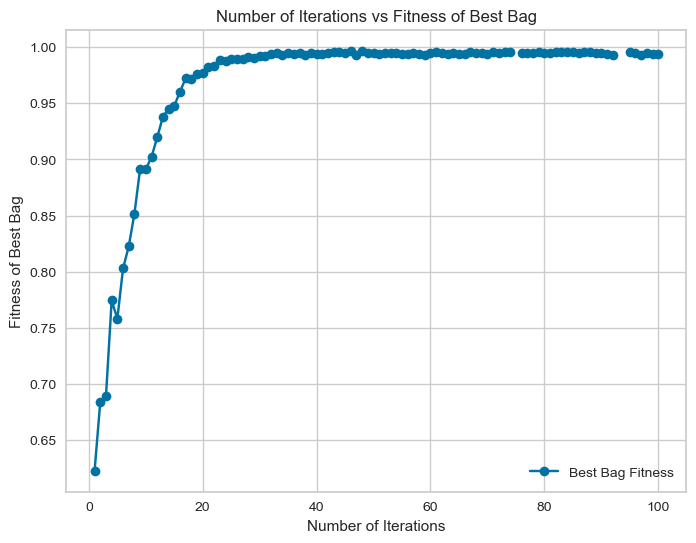

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
# ... Previous code ...

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_q_stat = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_q_stats = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        q_statistics_list = []  # To store Q-statistics for each bag

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict_proba(X_train_bag)
                ensemble_preds[:, idx] = preds[:, 1]  # Store only class probabilities for class 1

            # Calculate Q-statistics as a measure of classifier disagreement
            q_stat = q_statistics(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            q_statistics_list.append(q_stat)

        # ... Rest of the code remains the same ...

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(q_statistics_list) * w_q_stat

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_q_stat = q_statistics_list[worst_bag_index]

        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_q_stats.append(worst_bag_q_stat)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and Q-statistics based on the worst bag
        if np.mean(accuracies) > np.mean(q_statistics_list):
            w_acc *= 0.9  # Decrease weight for accuracy
            w_q_stat *= 1.1  # Increase weight for Q-statistics
        else:
            w_acc *= 1.1  # Increase weight for accuracy
            w_q_stat *= 0.9  # Decrease weight for Q-statistics

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_q_stat
        w_acc /= total_weight
        w_q_stat /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Q-statistics: {worst_bag_q_stat}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Q-statistics Weight: {w_q_stat}") 
            print()

    return bags, worst_bag_accuracies, worst_bag_q_stats, worst_bag_fitnesses

# ... Rest of the code remains the same ...


# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# ... Rest of the code for evaluation and plotting remains the same ...

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()





Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9736842105263158
AUC: 0.9680641991483786
Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
F1 Score: 1.0
G-measure: 1.0


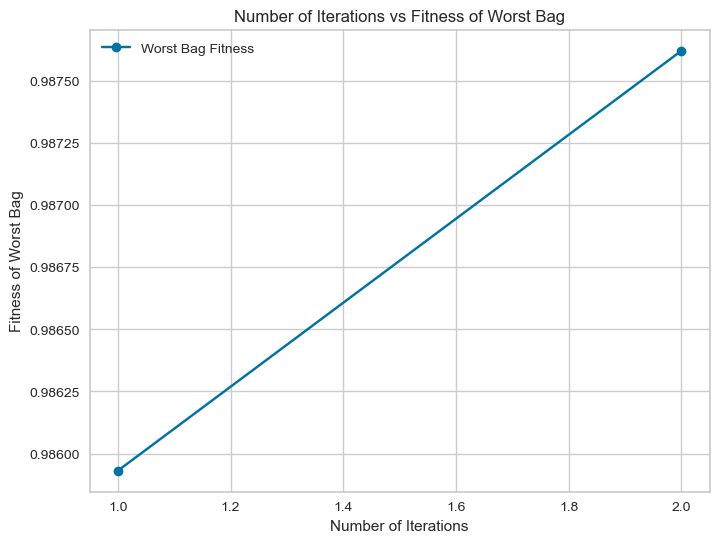

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Q statistics between classifiers' predictions
def q_statistics(predictions1, predictions2):
    agreement_matrix = np.equal(predictions1, predictions2)
    q_value = np.mean(agreement_matrix)
    return q_value

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 2
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []
        fitnesses = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Q statistics between classifiers' predictions
            diversity = q_statistics(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

            # Calculate fitness for each bag using dynamic weights
            fitness = accuracy * w_acc + diversity * w_div
            fitnesses.append(fitness)

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitnesses)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(worst_bag_accuracy)
        best_bag_diversities.append(worst_bag_diversity)
        best_bag_fitnesses.append(fitnesses[worst_bag_index])

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset if it improves the fitness
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        X_train_new_bag, y_train_new_bag = data[new_bag, :-1], data[new_bag, -1]
        ensemble_preds_new_bag = np.empty((len(X_train_new_bag), len(classifiers)))
        for idx, (name, clf) in enumerate(classifiers.items()):
            model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
            model.fit(X_train_new_bag, y_train_new_bag)
            preds = model.predict(X_train_new_bag)
            ensemble_preds_new_bag[:, idx] = preds
        accuracy_new_bag = accuracy_score(y_train_new_bag, np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_new_bag))
        diversity_new_bag = q_statistics(ensemble_preds_new_bag[:, 1:], ensemble_preds_new_bag[:, :-1])
        fitness_new_bag = accuracy_new_bag * w_acc + diversity_new_bag * w_div
        if fitness_new_bag > fitnesses[worst_bag_index]:
            bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Q Statistics): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitnesses[worst_bag_index]}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# (Previous code remains unchanged)

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Use the optimized ensemble to make predictions on the testing data
X_test, y_test = shuffle(X_test, y_test, random_state=42)  # Shuffle the testing data
ensemble_preds_test = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    ensemble_preds_test[:, idx] = preds_test

# Calculate probabilities from the ensemble's predictions
ensemble_probs_test = np.mean(ensemble_preds_test, axis=1)

# Calculate evaluation metrics for the ensemble predictions
ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds_test)
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_probs_test)


# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)


# Line plot for number of iterations vs fitness of best bag
num_iterations = 2 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()



In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}") 
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


Iteration 20:
Worst Bag Accuracy: 0.998211091234347
Worst Bag Diversity (Bhattacharyya Distance): 0.5334930840016117
Worst Bag Fitness: 0.9782747813275159
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Worst Bag Accuracy: 0.9980732177263969
Worst Bag Diversity (Bhattacharyya Distance): 0.3489587757476665
Worst Bag Fitness: 0.9936840829580565
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931



KeyboardInterrupt: 

Iteration: 0
Best Bag - Accuracy: 1.0 Diversity: 0.011627906976744188
Worst Bag - Accuracy: 0.9781659388646288 Diversity: 0.015283842794759825
Iteration: 1
Best Bag - Accuracy: 1.0 Diversity: 0.011627906976744188
Worst Bag - Accuracy: 0.9858657243816255 Diversity: 0.024734982332155476
Iteration: 2
Best Bag - Accuracy: 1.0 Diversity: 0.011627906976744188
Worst Bag - Accuracy: 0.9797297297297297 Diversity: 0.02308558558558559
Iteration: 3
Best Bag - Accuracy: 1.0 Diversity: 0.013565891472868215
Worst Bag - Accuracy: 0.9883720930232558 Diversity: 0.009205426356589148
Iteration: 4
Best Bag - Accuracy: 1.0 Diversity: 0.013565891472868215
Worst Bag - Accuracy: 0.991701244813278 Diversity: 0.011756569847856155
Iteration: 5
Best Bag - Accuracy: 1.0 Diversity: 0.011627906976744188
Worst Bag - Accuracy: 0.9837837837837838 Diversity: 0.02657657657657658
Iteration: 6
Best Bag - Accuracy: 1.0 Diversity: 0.013565891472868215
Worst Bag - Accuracy: 0.9867549668874173 Diversity: 0.018763796909492276
It

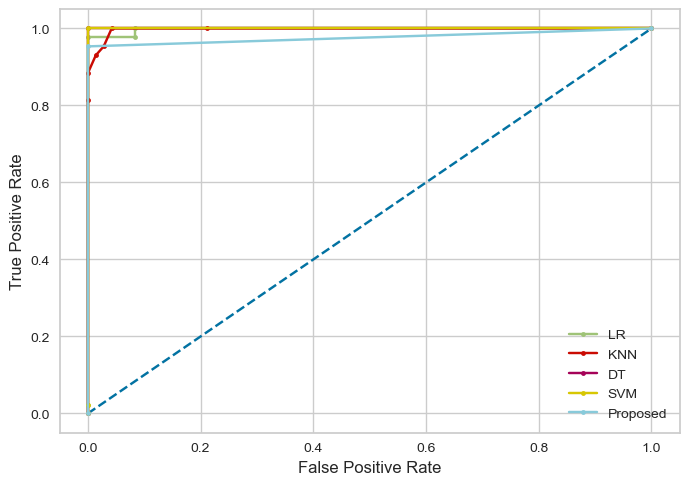

Confusion Matrix:
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771
AUC: 0.9767441860465116
Precision: 1.0
Sensitivity: 0.9534883720930233
F1-measure: 0.9761904761904763
Specificity: 1.0
G measure: 0.9761904761904763


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import pdist
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(X_train) // 2
max_bag_size = len(X_train)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'LR': {
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(X, y, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(X), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Perform TLBO optimization
    num_iterations = 10
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag
        for bag_idx, bag in enumerate(bags):
            X_train, y_train = X[bag], y[bag]

            ensemble_preds = np.empty((len(X_train), len(classifiers)))
            distances = np.zeros((len(classifiers), len(classifiers)))

            # Train and predict with each classifier
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
                model.fit(X_train, y_train)
                preds = model.predict(X_train)
                ensemble_preds[:, idx] = preds

            # Calculate disagreement matrix
            pairwise_disagreements = pdist(ensemble_preds.T, 'hamming')
            distances[np.triu_indices(len(classifiers), 1)] = pairwise_disagreements
            distances += distances.T

            # Calculate diversity as average pairwise disagreement
            diversity = np.mean(pairwise_disagreements)

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag
        fitness = np.mean(accuracies) + np.mean(diversities)

        # Identify the bag with the best and worst performance
        best_bag_index = np.argmax(accuracies)
        worst_bag_index = np.argmin(accuracies)

        # Print accuracy and diversity for the best and worst bags
        print("Iteration:", iteration)
        print("Best Bag - Accuracy:", accuracies[best_bag_index], "Diversity:", diversities[best_bag_index])
        print("Worst Bag - Accuracy:", accuracies[worst_bag_index], "Diversity:", diversities[worst_bag_index])

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(X), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

    # Return the optimized bags
    return bags

# Perform TLBO optimization to get the optimal bags
optimal_bags = tlbo_optimization(X, y, classifiers, num_bags, min_bag_size, max_bag_size)
ensemble_preds = np.empty((len(X_test), len(classifiers)))

fpr_list = []
tpr_list = []

for idx, (name, clf) in enumerate(classifiers.items()):
    model = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
    model.fit(X, y)
    preds = model.predict(X_test)
    preds1 = model.predict_proba(X_test)
    pos_probs =  preds1[:, 1]
    ensemble_preds[:, idx] = preds

    # Calculate FPR and TPR for ROC curve
    fpr, tpr, _ = roc_curve(y_test, pos_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Majority voting for ensemble predictions
ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=ensemble_preds)

# Plotting ROC curves
pyplot.plot([0, 1], [0, 1], linestyle='--')  # No Skill ROC curve

# Plot ROC curves for base models
for fpr, tpr, (name, _) in zip(fpr_list, tpr_list, classifiers.items()):
    pyplot.plot(fpr, tpr, marker='.', label=name)

# Plot ROC curve for the proposed model
fpr_proposed, tpr_proposed, _ = roc_curve(y_test, ensemble_preds_majority)
pyplot.plot(fpr_proposed, tpr_proposed, marker='.', label='Proposed')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show the legend
pyplot.legend()

# Show the plot
pyplot.show()

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
precision = precision_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Confusion matrix
cm = confusion_matrix(y_test, ensemble_preds_majority)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute specificity
tn, fp, fn, tp = confusion_matrix(y_test, ensemble_preds_majority).ravel()
specificity = tn / (tn + fp)

# Compute G-measure
g_measure = 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("F1-measure:", f1_measure)
print("Specificity:", specificity)
print("G measure:", g_measure)


Iteration: 0
Best Bag - Accuracy: 1.0 Diversity: 0.0058309037900874635
Worst Bag - Accuracy: 0.9792899408284024 Diversity: 0.01725838264299803
Iteration: 1
Best Bag - Accuracy: 1.0 Diversity: 0.0058309037900874635
Worst Bag - Accuracy: 0.9849056603773585 Diversity: 0.023899371069182388
Iteration: 2
Best Bag - Accuracy: 1.0 Diversity: 0.0058309037900874635
Worst Bag - Accuracy: 0.9873417721518988 Diversity: 0.017721518987341773
Iteration: 3
Best Bag - Accuracy: 1.0 Diversity: 0.0058309037900874635
Worst Bag - Accuracy: 0.9877049180327869 Diversity: 0.012295081967213115
Iteration: 4
Best Bag - Accuracy: 1.0 Diversity: 0.0058309037900874635
Worst Bag - Accuracy: 0.992 Diversity: 0.008666666666666666


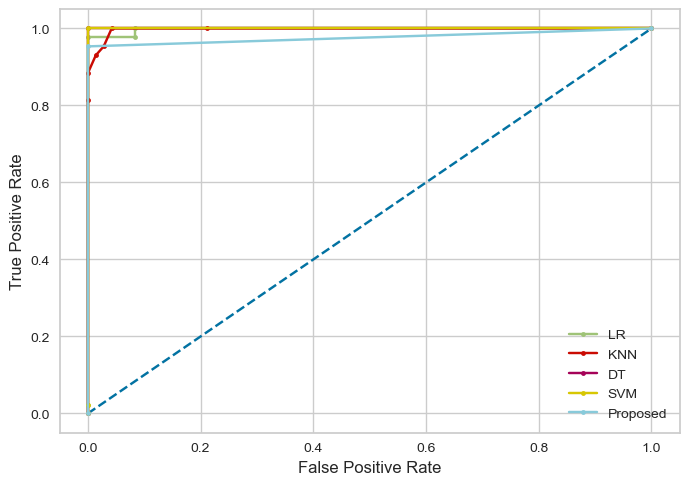

Confusion Matrix:
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771
AUC: 0.9767441860465116
Precision: 1.0
Sensitivity: 0.9534883720930233


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import pdist
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot

# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(X_train) // 2
max_bag_size = len(X_train)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'LR': {
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(X, y, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(X), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Perform TLBO optimization
    num_iterations = 5
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag
        for bag_idx, bag in enumerate(bags):
            X_train, y_train = X[bag], y[bag]

            ensemble_preds = np.empty((len(X_train), len(classifiers)))
            distances = np.zeros((len(classifiers), len(classifiers)))

            # Train and predict with each classifier
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
                model.fit(X_train, y_train)
                preds = model.predict(X_train)
                ensemble_preds[:, idx] = preds

            # Calculate disagreement matrix
            pairwise_disagreements = pdist(ensemble_preds.T, 'hamming')
            distances[np.triu_indices(len(classifiers), 1)] = pairwise_disagreements
            distances += distances.T

            # Calculate diversity as average pairwise disagreement
            diversity = np.mean(pairwise_disagreements)

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag
        fitness = np.mean(accuracies) + np.mean(diversities)

        # Identify the bag with the best and worst performance
        best_bag_index = np.argmax(accuracies)
        worst_bag_index = np.argmin(accuracies)

        # Print accuracy and diversity for the best and worst bags
        print("Iteration:", iteration)
        print("Best Bag - Accuracy:", accuracies[best_bag_index], "Diversity:", diversities[best_bag_index])
        print("Worst Bag - Accuracy:", accuracies[worst_bag_index], "Diversity:", diversities[worst_bag_index])

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(X), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

    # Return the optimized bags
    return bags

# Perform TLBO optimization to get the optimal bags
optimal_bags = tlbo_optimization(X, y, classifiers, num_bags, min_bag_size, max_bag_size)
ensemble_preds = np.empty((len(X_test), len(classifiers)))

fpr_list = []
tpr_list = []

for idx, (name, clf) in enumerate(classifiers.items()):
    model = GridSearchCV(clf['model'], clf['param_grid'], cv=5)
    model.fit(X, y)
    preds = model.predict(X_test)
    preds1 = model.predict_proba(X_test)
    pos_probs =  preds1[:, 1]
    ensemble_preds[:, idx] = preds

    # Calculate FPR and TPR for ROC curve
    fpr, tpr, _ = roc_curve(y_test, pos_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Majority voting for ensemble predictions
ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(x.astype(int))), axis=1, arr=ensemble_preds)

# Plotting ROC curves
pyplot.plot([0, 1], [0, 1], linestyle='--')  # No Skill ROC curve

# Plot ROC curves for base models
for fpr, tpr, (name, _) in zip(fpr_list, tpr_list, classifiers.items()):
    pyplot.plot(fpr, tpr, marker='.', label=name)

# Plot ROC curve for the proposed model
fpr_proposed, tpr_proposed, _ = roc_curve(y_test, ensemble_preds_majority)
pyplot.plot(fpr_proposed, tpr_proposed, marker='.', label='Proposed')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show the legend
pyplot.legend()

# Show the plot
pyplot.show()

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
precision = precision_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Confusion matrix
cm = confusion_matrix(y_test, ensemble_preds_majority)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Compute specificity
tn, fp, fn, tp = confusion_matrix(y_test, ensemble_preds_majority).ravel()
specificity = tn / (tn + fp)

# Compute G-measure
g_measure = 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Precision:", precision)
print("Sensitivity:", sensitivity)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, stratify = y)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(512, 31)
(512,)
(57, 31)
(57,)


In [18]:
print("Benign : ", data[data.diagnosis == 0].shape[0])
print("Malignant : ", data[data.diagnosis == 1].shape[0])
print("Training : \n", y_train.value_counts())
print("Test : \n", y_test.value_counts())

Benign :  357
Malignant :  212
Training : 
 0    321
1    191
Name: diagnosis, dtype: int64
Test : 
 0    36
1    21
Name: diagnosis, dtype: int64


### Machine Learning 


In [21]:
# oversample
# The data is imbalanced. Therefore I use smote method to oversample the data
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
x_adasynsmote, y_adasynsmote = oversample.fit_resample(x_train, y_train)
x_train, y_train = x_adasynsmote, y_adasynsmote
y_adasynsmote.value_counts()

0    321
1    319
Name: diagnosis, dtype: int64

In [22]:
!pip install mlxtend

In [23]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlxtend.classifier

In [24]:
from mlxtend.classifier import StackingCVClassifier

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
###############################################################################
#                          1. Importing Libraries                             #
###############################################################################
# For reading, visualizing, and preprocessing data
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier # <- Here is our boy

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')




In [27]:
# Python libraries
# Classic,data manipulation and linear algebra

import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import missingno as msno

# Data processing, metrics and modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Display Settings

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 25)

In [28]:
#Libraries for classifiers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, plot_confusion_matrix,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from sklearn import metrics

# Logistic Regression Hyper parameter tuning

In [31]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
x, y = x_train,y_train
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 100, 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 100, 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 100, 'solver': 'lbfgs'}
1.000000 (0.000000) with: {'C': 100, 'solver': 'liblinear'}
1.000000 (0.000000) with: {'C': 10, 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 10, 'solver': 'lbfgs'}
1.000000 (0.000000) with: {'C': 10, 'solver': 'liblinear'}
1.000000 (0.000000) with: {'C': 1.0, 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 1.0, 'solver': 'lbfgs'}
1.000000 (0.000000) with: {'C': 1.0, 'solver': 'liblinear'}
0.999902 (0.000293) with: {'C': 0.1, 'solver': 'newton-cg'}
0.999902 (0.000293) with: {'C': 0.1, 'solver': 'lbfgs'}
0.999805 (0.000529) with: {'C': 0.1, 'solver': 'liblinear'}
0.994075 (0.005740) with: {'C': 0.01, 'solver': 'newton-cg'}
0.994075 (0.005740) with: {'C': 0.01, 'solver': 'lbfgs'}
0.993749 (0.005887) with: {'C': 0.01, 'solver': 'liblinear'}


KNN Hyper parameter tuning

In [33]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# define dataset
x, y = x_train,y_train
# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999935 using {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
0.989631 (0.010859) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.989631 (0.010859) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.992463 (0.009722) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.992658 (0.009657) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.995995 (0.008613) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.996288 (0.008711) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.998551 (0.003998) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.998877 (0.003949) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.999300 (0.001368) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.999837 (0.000443) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.999333

SVM Hyper parameter tuning

In [34]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
x, y = x_train,y_train
# define model and parameters
model = SVC()
kernel = ['rbf']
C = [100, 50, 10, 1.0, 0.1]
gamma = [10, 1.0, 0.1,0.01,0.001]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc', error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.908293 (0.020132) with: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
0.995035 (0.005804) with: {'C': 100, 'gamma': 1.0, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.908293 (0.020132) with: {'C': 50, 'gamma': 10, 'kernel': 'rbf'}
0.995035 (0.005804) with: {'C': 50, 'gamma': 1.0, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.908293 (0.020132) with: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.995035 (0.005804) with: {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
1.000000 (0.000000) with: {'C': 10, 'gamma': 0.01, 'kernel

DT Hyper parameter tuning

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define dataset
x, y =  x_train,y_train
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=dt, 
#                            param_grid=params, 
#                            cv=cv, n_jobs=-1, verbose=1, scoring = "f1")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "roc_auc",error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Best: 1.000000 using {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
1.000000 (0.000000) with: {'criterion': 'gini', 'max_depth': 3, 

In [38]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=10)
clf.fit(x_train, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [39]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [41]:
random_state = 42

>lr 1.000 (0.000)
>knn 1.000 (0.000)
>dt 1.000 (0.000)
>mlp 1.000 (0.000)


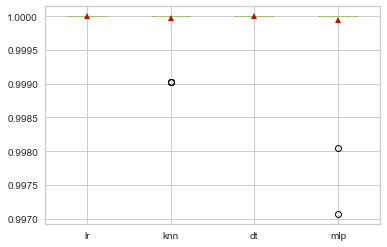

In [42]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier


# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(C=100, penalty='l2',solver='newton-cg',random_state=random_state)
	models['knn'] = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
	models['svm'] = svc.SVM(metric='manhattan', n_neighbors=11, weights='distance')
	models['dt'] = DecisionTreeClassifier(criterion="gini",max_depth=2, min_samples_leaf=5, random_state=random_state)
	models['mlp'] = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, x_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10,  random_state=random_state)
	scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, x_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.862 (0.044)
>knn 0.958 (0.022)
>dt 0.923 (0.031)
>mlp 0.917 (0.032)
>stacking 0.941 (0.029)


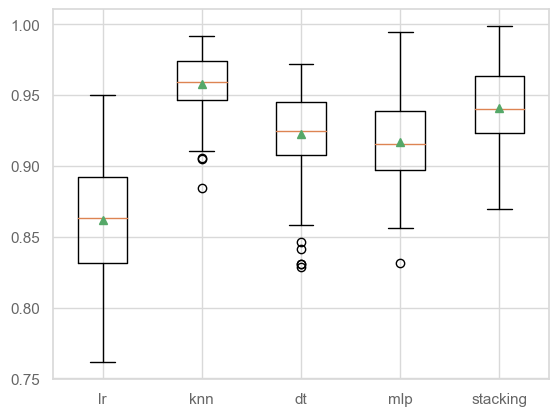

In [103]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
	# define the base models
	models = dict()
	models['lr'] = LogisticRegression(C=100, penalty='l2',solver='newton-cg',random_state=random_state)
	models['knn'] = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
	models['dt'] = DecisionTreeClassifier(criterion="gini",max_depth=2, min_samples_leaf=5, random_state=random_state)
	models['mlp'] = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)
	return models

	# define meta learner model
	level1 = SVC(C=10,gamma=1.0,random_state = random_state)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)
	models['knn'] = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
	models['dt'] = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)
	models['mlp'] = MLPClassifier(activation = "tanh", alpha = 0.05, hidden_layer_sizes = (50,50,50),
                            learning_rate = "constant", max_iter = 5000, random_state = random_state)
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10,random_state=random_state)
	scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [149]:
import math 

In [150]:
K = 1
pie1 = 2.05
pie2 = 2.05
pie = pie1+ pie2
khi = 2*K/(abs(2-pie-math.sqrt(pie**2-4*pie)))
n_iterations = 10
n_particles = 20
c1=khi*pie1
c2=khi*pie2

In [161]:
def fitness_function(position):
    kf = KFold(n_splits = 5)
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
   # svclassifier.fit(X_train, y_train)
    #auc = cross_val_score(svclassifier, X_train, y_train, cv = kf, scoring = 'roc_auc')
    #print("auc",auc)
    #scores = cross_val_score(svclassifier, gbxPSO, y, cv = kf, scoring = 'accuracy')
    #auc_score_mean=np.mean(auc)
    #print("auc_score_mean",auc_score_mean)
    f1_score = cross_val_score(svclassifier, X_train, y_train, cv = kf, scoring = 'f1')  
    print("f1_score", f1_score)
    f1_score_mean=np.mean(f1_score)    
    print("f1_score_mean",f1_score_mean)
    #g_measure = cross_val_score(svclassifier, X_train, y_train, cv = kf, scoring = 'geometric_mean_score')
    #g_measure_mean=np.mean(g_measure)
    #average=(auc_score_mean+f1_score_mean)/2
#    return max(auc_score_mean,f1_score_mean,average)
    return f1_score_mean
   # y_train_pred = svclassifier.predict(X_train)
   # y_test_pred = svclassifier.predict(X_test)   
   # return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

for i in range(n_particles):
    max_velocity = np.array([10,10])
    min_velocity = np.array([-10,-10])
    max_position = np.array([10,10])
    min_position = np.array([0.0001, 0.001])

def eval_velocity(new_velocity):
    for j in range(0,2):
        if(new_velocity[j] > max_velocity[j]):
            new_velocity[j] = max_velocity[j]
        elif(new_velocity[j] < min_velocity[j]):
            new_velocity[j] = min_velocity[j]
    return new_velocity

def eval_position(particle_position_vector):
    for j in range(0,2):
        if(particle_position_vector[j] > max_position[j]):
            particle_position_vector[j] = max_position[j]
        elif(particle_position_vector[j] < min_position[j]):
            particle_position_vector[j] = min_position[j]
    return particle_position_vector
        

In [162]:
random.seed(10)
particle_position_vector = np.array([np.array([random.random()*10, random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
print(pbest_position.shape)
pbest_fitness_value = np.array([0 for _ in range(n_particles)])
#print(pbest_fitness_value)
gbest_fitness_value = 0
#print(gbest_fitness_value)
gbest_position = np.array([999,999,999,999])
velocity_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))*random.random()*2,(-1) ** (bool(random.getrandbits(1))) * random.random()*2]) for _ in range(n_particles)])
print(velocity_vector.shape)
iteration = 0

(20, 2)
(20, 2)


In [163]:
print(particle_position_vector)

[[5.71402595 4.28889055]
 [5.78091301 2.06098232]
 [8.13321251 8.23588873]
 [6.53472534 1.60229557]
 [5.2066936  3.27772812]
 [2.49996677 9.52816909]
 [9.96556993 0.44556382]
 [8.60161037 6.03190611]
 [3.81605986 2.83618218]
 [6.74964847 4.56831151]
 [6.85861485 6.6184632 ]
 [1.32978145 7.67837814]
 [9.82413249 9.6938816 ]
 [6.13326821 0.44260633]
 [0.04055144 1.33972527]
 [9.41002271 3.02860562]
 [3.66145602 8.98196245]
 [3.14363805 5.48982184]
 [4.36030958 0.64994176]
 [5.84546226 8.44067898]]


In [164]:
import random

In [165]:
particle_position_vector

array([[5.71402595, 4.28889055],
       [5.78091301, 2.06098232],
       [8.13321251, 8.23588873],
       [6.53472534, 1.60229557],
       [5.2066936 , 3.27772812],
       [2.49996677, 9.52816909],
       [9.96556993, 0.44556382],
       [8.60161037, 6.03190611],
       [3.81605986, 2.83618218],
       [6.74964847, 4.56831151],
       [6.85861485, 6.6184632 ],
       [1.32978145, 7.67837814],
       [9.82413249, 9.6938816 ],
       [6.13326821, 0.44260633],
       [0.04055144, 1.33972527],
       [9.41002271, 3.02860562],
       [3.66145602, 8.98196245],
       [3.14363805, 5.48982184],
       [4.36030958, 0.64994176],
       [5.84546226, 8.44067898]])

In [166]:
scatterxI = particle_position_vector[:,0]
scatteryI = particle_position_vector[:,1]

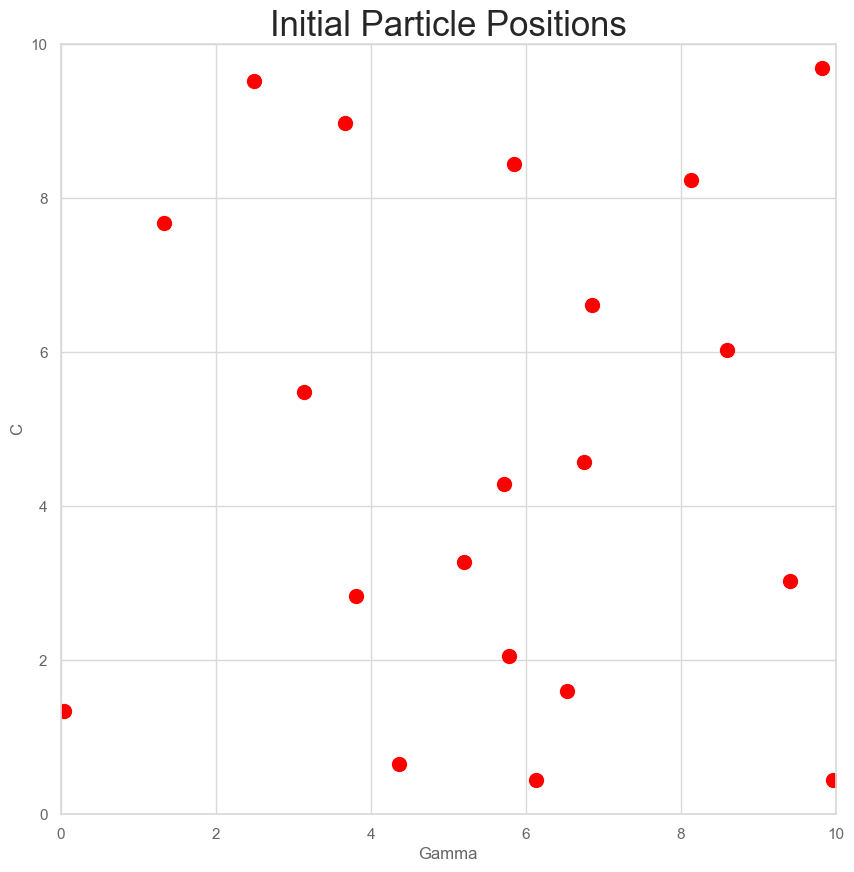

In [167]:
plt.figure(figsize=(10,10))
plt.scatter(scatterxI, scatteryI, c="red", s=100)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Initial Particle Positions",fontsize=25)
#file_path = './PlotALL/' + current_time + ' Initial_particle.png'
plt.savefig("initial")
plt.show()

In [168]:
def plot(particle_position_vector,itr):
    #file_path = './PlotALL/'+ current_time + ' Itr'+str(itr) + '.png'
    scatterx = particle_position_vector[:,0]
    scattery = particle_position_vector[:,1]
    plt.figure(figsize=(10,10))
    plt.scatter(scatterxI, scatteryI, c="red", s=100)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel("Gamma")
    plt.ylabel("C")
    title = "Iteration : " + str(itr)
    plt.title(title,fontsize=25)
    plt.savefig("position.png")
    plt.close()

In [169]:
fitness_cadidate

nan

In [170]:
#start = time()
while iteration < n_iterations:
    gbest_fitness_value_cadidate = np.array([0])
    gbest_position_cadidate = np.array([float('inf'), float('inf')])
    #start1 = time()
    plot(particle_position_vector,iteration)
    for i in range(n_particles):
        #start2 = time()
        fitness_cadidate = fitness_function(particle_position_vector[i])
        #stop2 = time()
        print("Particle :", i+1, " (Gamma, C, AUC): ", particle_position_vector[i][0], ",", particle_position_vector[i][1], ",",fitness_cadidate)
            
        if(pbest_fitness_value[i] < fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value_cadidate < fitness_cadidate):
            gbest_fitness_value_cadidate = fitness_cadidate
            gbest_position_cadidate = particle_position_vector[i]
        
    print("Best position in iteration ", iteration + 1, " is", gbest_position_cadidate)
    
    #if(gbest_fitness_value < gbest_fitness_value_cadidate):
       # gbest_fitness_value = gbest_fitness_value_cadidate
        #gbest_position = gbest_position_cadidate
    
    for i in range(n_particles):
        new_velocity = khi*(velocity_vector[i] + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position_cadidate-particle_position_vector[i]))
        new_velocity = eval_velocity(new_velocity)
            
        particle_position_vector[i] = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = eval_position(particle_position_vector[i])
    
    iteration = iteration + 1
    #stop1 = time()
    #sec = stop1-start1
    #print("Time taken in this iteration : ",sec," seconds.")
print("Global Best Position : ",gbest_position)
#stop = time()
#print("Total time taken : ",stop - start, " seconds.")


f1_score 0.7853703703703704
auc_score_mean 0.8030222243959914
Particle : 1  (Gamma, C, AUC):  5.714025946899135 , 4.288890546751146 , 0.8030222243959914
f1_score 0.7853703703703704
auc_score_mean 0.8022272299167863
Particle : 2  (Gamma, C, AUC):  5.780913011344704 , 2.0609823213950174 , 0.8022272299167863
f1_score 0.7853703703703704
auc_score_mean 0.7374239760885991
Particle : 3  (Gamma, C, AUC):  8.1332125135732 , 8.235888725334455 , 0.7374239760885991
f1_score 0.7853703703703704
auc_score_mean 0.7816531543938362
Particle : 4  (Gamma, C, AUC):  6.534725339011757 , 1.6022955651881965 , 0.7816531543938362
f1_score 0.7853703703703704
auc_score_mean 0.8146946583592705
Particle : 5  (Gamma, C, AUC):  5.206693596399246 , 3.2777281162209313 , 0.8146946583592705
f1_score 0.7853703703703704
auc_score_mean 0.879346181711895
Particle : 6  (Gamma, C, AUC):  2.4999667668640035 , 9.528169091459116 , 0.879346181711895
f1_score 0.7853703703703704
auc_score_mean 0.44048828569262266
Particle : 7  (Gamm

level0 = list()
	level0.append(('lr', LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)))
	level0.append(('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')))
	level0.append(('dt', DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)))
	level0.append(('mlp', MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)))

>lr 0.862 (0.044)
>knn 0.958 (0.022)
>dt 0.923 (0.031)
>mlp 0.917 (0.032)
>stacking 0.964 (0.018)


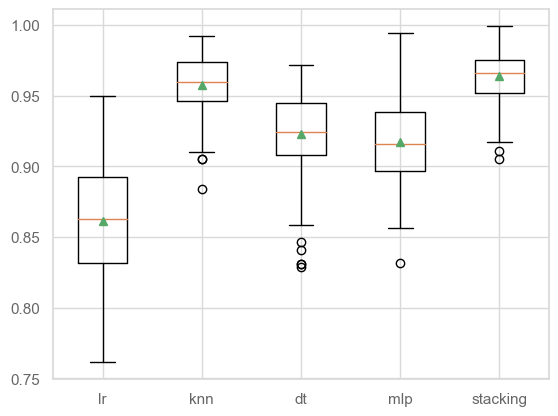

In [171]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr',LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)))
	level0.append(('knn',  KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')))
	level0.append(('dt', DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)))
	level0.append(('mlp', MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)))
	# define meta learner model
	level1 = SVC(C=8.76,gamma=0.060)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)
	models['knn'] =KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
	models['dt'] = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)
	models['mlp'] = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10,random_state=random_state)
	scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [172]:
from sklearn.ensemble import BaggingClassifier

In [174]:
Bagging_DT=BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 1000,random_state = random_state)

>lr 0.862 (0.044)
>knn 0.958 (0.022)
>dt 0.923 (0.031)
>mlp 0.917 (0.032)
>stacking 0.957 (0.022)


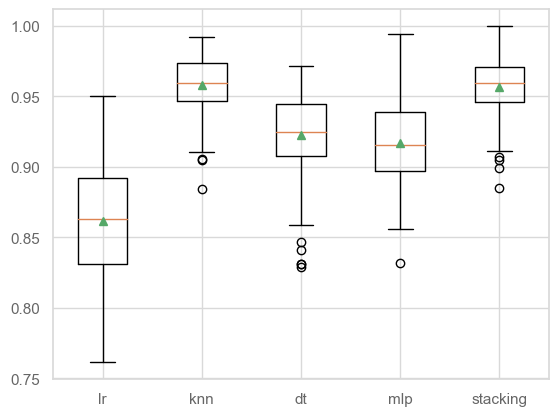

In [175]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr',  LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)))
	level0.append(('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')))
	level0.append(('dt',DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)))
	level0.append(('mlp',  MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)))
	# define meta learner model
	level1 = Bagging_DT
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)
	models['knn'] = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
	models['dt'] = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)
	models['mlp'] = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10,random_state=random_state)
	scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
parameters = {
     "n_neighbors": range(1, 50),
     "weights": ["uniform", "distance"],
 }
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [178]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)  

In [179]:
from sklearn.ensemble import BaggingClassifier
bagging_knn = BaggingClassifier(bagged_knn, n_estimators=50)

In [ ]:
level0.append(('lr',  LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)))
	level0.append(('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')))
	level0.append(('dt',DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)))
	level0.append(('mlp',  MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)))
	# define meta learner model

>lr 0.862 (0.044)
>knn 0.958 (0.022)
>dt 0.923 (0.031)
>mlp 0.917 (0.032)
>stacking 0.936 (0.026)


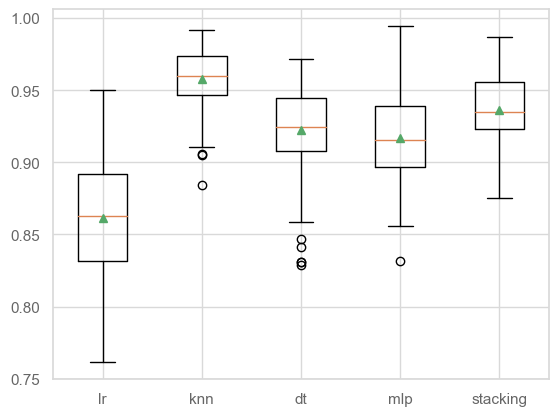

In [180]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr',LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)))
	level0.append(('knn',KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')))
	level0.append(('dt', DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)))
	level0.append(('mlp',MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)))
	# define meta learner model
	level1 = BaggingClassifier(bagged_knn, n_estimators=100)
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)
	models['knn'] = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')
	models['dt'] = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)
	models['mlp'] = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10,random_state=random_state)
	scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>bagged_DT 0.961 (0.019)
>bagged_KNN 0.929 (0.030)
>stacking 0.969 (0.017)


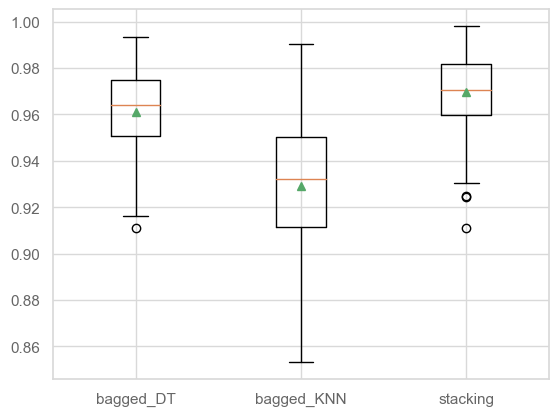

In [181]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

def get_stacking():
    # define the base models
    estimators = [('bagging_knn',BaggingClassifier(bagged_knn, n_estimators=100,random_state=random_state)),      
                      ('Bagging_DT', BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 1000,random_state = random_state))
                 ]
    
   # define meta learner model
    level1 = SVC(C=8.76,gamma=0.060)
   # define the stacking ensemble
    model = StackingClassifier(estimators=estimators, final_estimator=level1, cv=10)
    return model



    

# get a list of models to evaluate
def get_models():
	models = dict()
	models['bagged_DT'] = Bagging_DT
	models['bagged_KNN'] = bagging_knn
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10,random_state=random_state)
	scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [182]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Logistic regression classifier
classifier1 = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)

# Initializing K Nearest Neighbour  classifier
classifier2 = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

# Initialing Decision tree classifier
classifier3 = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)

# Initializing Multi layer perceptron classifier
classifier4 = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)

In [189]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3,classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(probability = True))

In [190]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DT": classifier3,
               "MLP": classifier4,               
               "Stack": sclf}

In [191]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [192]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

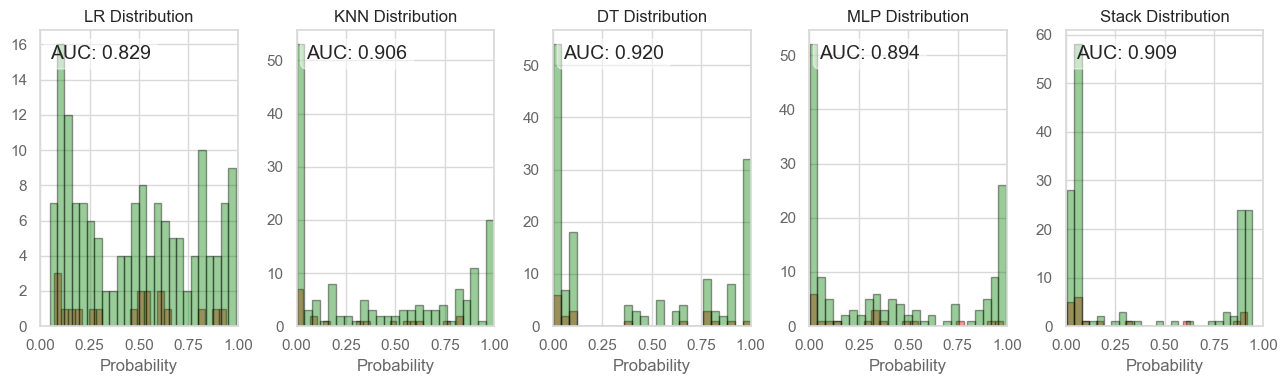

In [193]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)



In [317]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Logistic regression classifier
classifier1 = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)

# Initializing K Nearest Neighbour  classifier
classifier2 = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

# Initialing Decision tree classifier
classifier3 = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)

# Initializing Multi layer perceptron classifier
classifier4 = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)

In [318]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3,classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = BaggingClassifier(bagged_knn, n_estimators=100,random_state=random_state))

In [319]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DT": classifier3,
               "MLP": classifier4,               
               "Stack": sclf}

In [320]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [321]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
results1 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
    
# Add the test set to the results object
results["Target"] = y_test


In [324]:
for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    print('accuracy',accuracy_score)
    
    f1_score = metrics.f1_score(y_test, y_pred)
    print('f1_score', f1_score)
    recall_score=metrics.recall_score(y_test, y_pred)
    print('recall',recall_score)
   
    precision_score=metrics.precision_score(y_test, y_pred)
    print('precision',precision_score)
    

accuracy 0.7402597402597403
f1_score 0.6875
recall 0.8148148148148148
precision 0.5945945945945946
accuracy 0.8506493506493507
f1_score 0.8067226890756303
recall 0.8888888888888888
precision 0.7384615384615385
accuracy 0.8571428571428571
f1_score 0.8166666666666667
recall 0.9074074074074074
precision 0.7424242424242424
accuracy 0.8246753246753247
f1_score 0.7567567567567567
recall 0.7777777777777778
precision 0.7368421052631579
accuracy 0.8246753246753247
f1_score 0.7567567567567567
recall 0.7777777777777778
precision 0.7368421052631579


In [314]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

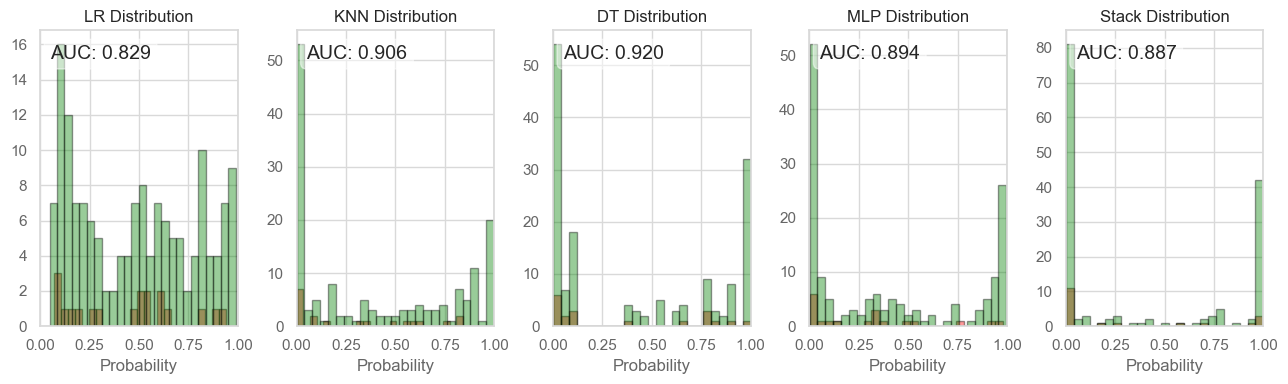

In [315]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)


In [325]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Logistic regression classifier
classifier1 = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)

# Initializing K Nearest Neighbour  classifier
classifier2 = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

# Initialing Decision tree classifier
classifier3 = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)

# Initializing Multi layer perceptron classifier
classifier4 = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)

In [354]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3,classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 500,random_state = random_state))

In [355]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DT": classifier3,
               "MLP": classifier4,               
               "Stack": sclf}

In [356]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [358]:
for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
        # Get AUC
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    print('accuracy',accuracy_score)
    
    f1_score = metrics.f1_score(y_test, y_pred)
    print('f1_score', f1_score)
    recall_score=metrics.recall_score(y_test, y_pred)
    print('recall',recall_score)
   
    precision_score=metrics.precision_score(y_test, y_pred)
    print('precision',precision_score)
    

KeyError: 'LR'

In [359]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Logistic regression classifier
classifier1 = LogisticRegression(C=0.1, penalty='l2',solver='newton-cg',random_state=random_state)

# Initializing K Nearest Neighbour  classifier
classifier2 = KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

# Initialing Decision tree classifier
classifier3 = DecisionTreeClassifier(criterion="gini",max_depth=20, min_samples_leaf=20, random_state=random_state)

# Initializing Multi layer perceptron classifier
classifier4 = MLPClassifier(activation = "tanh", alpha =  0.0001, hidden_layer_sizes = (10,30,10),
                            learning_rate = "adaptive",solver="adam", max_iter = 5000, random_state = random_state)

In [224]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3,classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(probability = True))

In [225]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DT": classifier3,
               "MLP": classifier4,               
               "Stack": sclf}

In [236]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [ ]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
results1 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
    
# Add the test set to the results object
results["Target"] = y_test


In [237]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
results1 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
    
# Add the test set to the results object
results["Target"] = y_test


In [238]:
from imblearn.metrics import specificity_score, sensitivity_score, geometric_mean_score
from sklearn.metrics import roc_auc_score

In [240]:

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    f1_score = metrics.f1_score(y_test, y_pred)
    print('f1_score', f1_score)
    precision_score=metrics.precision_score(y_test, y_pred)
    print('precision',precision_score)
    recall_score=metrics.recall_score(y_test, y_pred)
    print('recall',recall_score)
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    print('accuracy',accuracy_score)
    
    
    
    
   

f1_score 0.6875
precision 0.5945945945945946
recall 0.8148148148148148
accuracy 0.7402597402597403
f1_score 0.8067226890756303
precision 0.7384615384615385
recall 0.8888888888888888
accuracy 0.8506493506493507
f1_score 0.8166666666666667
precision 0.7424242424242424
recall 0.9074074074074074
accuracy 0.8571428571428571
f1_score 0.7567567567567567
precision 0.7368421052631579
recall 0.7777777777777778
accuracy 0.8246753246753247
f1_score 0.8035714285714286
precision 0.7758620689655172
recall 0.8333333333333334
accuracy 0.8571428571428571


In [241]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred1 = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred1

# Add the test set to the results object
results["Target"] = y_test

In [ ]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
results1 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
    
# Add the test set to the results object
results["Target"] = y_test


In [232]:
 specificity_score=specificity_score(y_test, y_pred)
   
    
print('specificity',specificity_score)
sensitivity_score=sensitivity_score(y_test, y_pred)
print('sensitivity', sensitivity_score)
geometric_mean_score=geometric_mean_score(y_test, y_pred)
print('geometric_mean', geometric_mean_score)
    
    

specificity 0.87
sensitivity 0.8333333333333334
geometric_mean 0.8514693182963201


In [248]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf1 = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3,classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(C=8.76,gamma=0.060,probability = True))

In [249]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DT": classifier3,
               "MLP": classifier4,               
               "Stack": sclf1}

In [244]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [ ]:
for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    f1_score = metrics.f1_score(y_test, y_pred)
    print('f1_score', f1_score)
    precision_score=metrics.precision_score(y_test, y_pred)
    print('precision',precision_score)
    recall_score=metrics.recall_score(y_test, y_pred)
    print('recall',recall_score)
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    print('accuracy',accuracy_score)

In [245]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

0.8287037037037037
0.9062037037037037
0.9204629629629628
0.8937037037037037
0.9279629629629631


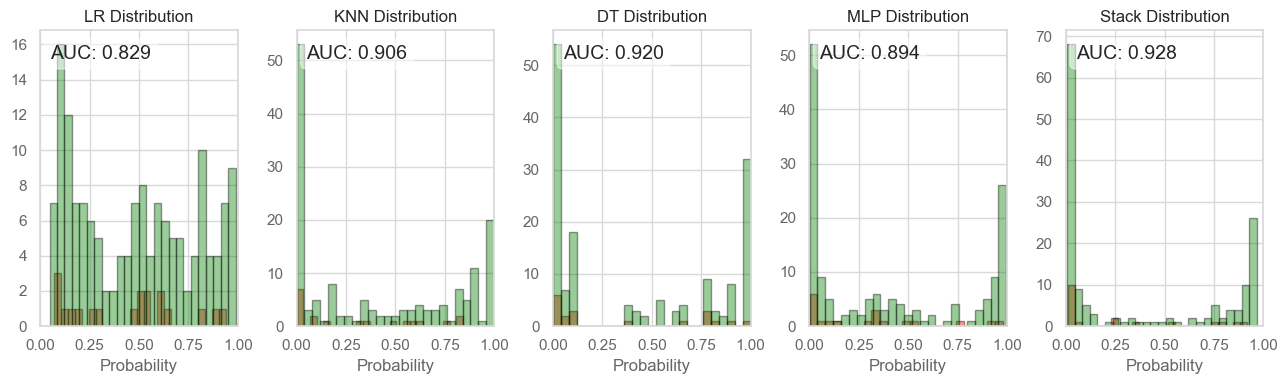

In [247]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"
    print(auc)

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)



In [273]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf1 = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3,classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(C=8.76,gamma=0.060,probability = True))

In [274]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"LR": classifier1,
               "KNN": classifier2,
               "DT": classifier3,
               "MLP": classifier4,               
               "Stack": sclf1}

In [275]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [253]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
results1 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
    
# Add the test set to the results object
results["Target"] = y_test


In [254]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

In [256]:
for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    print('accuracy',accuracy_score)
    f1_score = metrics.f1_score(y_test, y_pred)
    print('f1_score', f1_score)
    precision_score=metrics.precision_score(y_test, y_pred)
    print('precision',precision_score)
    recall_score=metrics.recall_score(y_test, y_pred)
    print('recall',recall_score)
    

accuracy 0.7402597402597403
f1_score 0.6875
precision 0.5945945945945946
recall 0.8148148148148148
accuracy 0.8506493506493507
f1_score 0.8067226890756303
precision 0.7384615384615385
recall 0.8888888888888888
accuracy 0.8571428571428571
f1_score 0.8166666666666667
precision 0.7424242424242424
recall 0.9074074074074074
accuracy 0.8246753246753247
f1_score 0.7567567567567567
precision 0.7368421052631579
recall 0.7777777777777778
accuracy 0.8636363636363636
f1_score 0.8141592920353983
precision 0.7796610169491526
recall 0.8518518518518519


In [290]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

0.9516666666666667
0.8755555555555556
0.9002777777777777


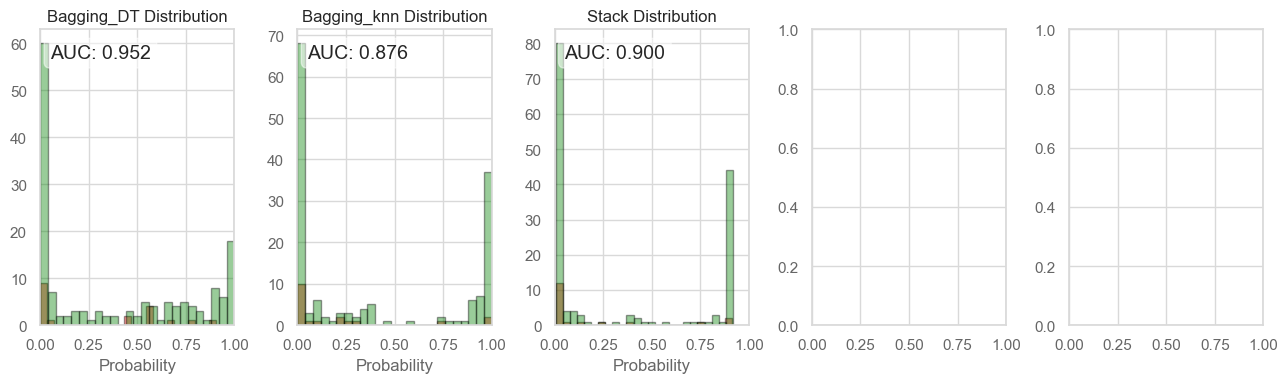

In [291]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"
    print(auc)

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)



In [346]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Logistic regression classifier
classifier5 = BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 1000,random_state = random_state)


# Initializing K Nearest Neighbour  classifier
classifier6 =  KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')


In [347]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf4 = StackingCVClassifier(classifiers = [classifier5, classifier6],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(C=8.76,gamma=0.060,probability=True))

In [348]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"Bagging_DT": classifier5,
               "Bagging_knn": classifier6,                         
               "Stack": sclf4}

In [349]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [350]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
results1 = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred
    
# Add the test set to the results object
results["Target"] = y_test

In [351]:
for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    print('accuracy',accuracy_score)
    f1_score = metrics.f1_score(y_test, y_pred)
    print('f1_score', f1_score)
    precision_score=metrics.precision_score(y_test, y_pred)
    print('precision',precision_score)
    recall_score=metrics.recall_score(y_test, y_pred)
    print('recall',recall_score)
    

accuracy 0.8766233766233766
f1_score 0.8403361344537816
precision 0.7692307692307693
recall 0.9259259259259259
accuracy 0.8506493506493507
f1_score 0.8067226890756303
precision 0.7384615384615385
recall 0.8888888888888888
accuracy 0.8571428571428571
f1_score 0.8103448275862069
precision 0.7580645161290323
recall 0.8703703703703703


In [352]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

0.9516666666666667
0.9062037037037037
0.940462962962963


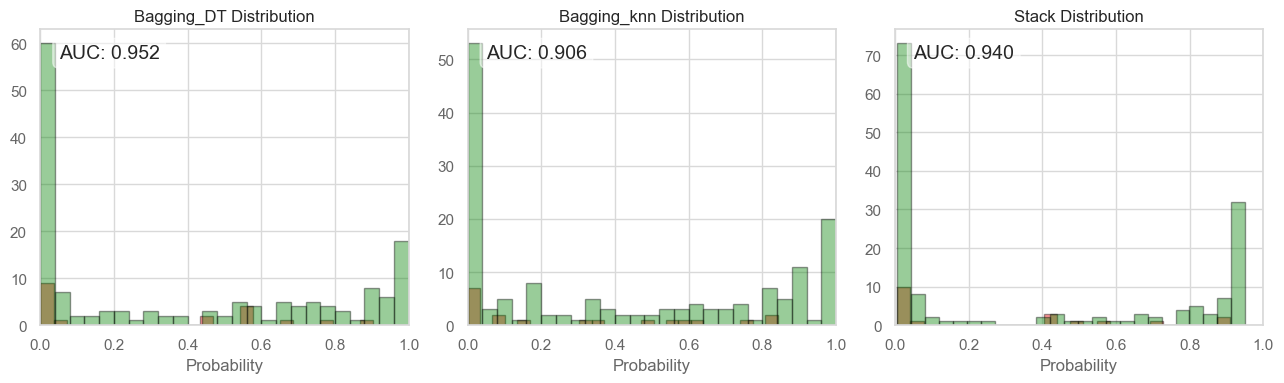

In [353]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 3)

for key, counter in zip(classifiers, range(3)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    print(auc)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

In [289]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Logistic regression classifier
classifier5 = Bagging_DT

# Initializing K Nearest Neighbour  classifier
classifier6 = bagging_knn


In [298]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf4 = StackingCVClassifier(classifiers = [classifier5, classifier6],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(C=8.76,gamma=0.060,probability=True))

In [299]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"Bagging_DT": classifier5,
               "Bagging_knn": classifier6,                         
               "Stack": sclf4}

In [300]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [301]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict(X_test)
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

In [302]:
from imblearn.metrics import geometric_mean_score

In [303]:
print(f"The geometric mean is {geometric_mean_score(y_test, y_pred):.3f}")

The geometric mean is 0.837


In [304]:
from imblearn.metrics import specificity_score, sensitivity_score, geometric_mean_score
from sklearn.metrics import roc_auc_score

In [307]:
for key, counter in zip(classifiers, range(3)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    accuracy_score=metrics.accuracy_score(y_test, y_pred)
    print('accuracy',accuracy_score)    
    auc_score = metrics.roc_auc_score(y_test, y_pred)
    print('auc_score', auc_score)
    f1_score = metrics.f1_score(y_test, y_pred)
    print('f1_score', f1_score)
    precision_score=metrics.precision_score(y_test, y_pred)
    print('precision',precision_score)
    recall_score=metrics.recall_score(y_test, y_pred)
    print('recall',recall_score)
   
    

    

accuracy 0.8766233766233766
auc_score 0.887962962962963
f1_score 0.8403361344537816
precision 0.7692307692307693
recall 0.9259259259259259
accuracy 0.8051948051948052
auc_score 0.7903703703703703
f1_score 0.7272727272727273
precision 0.7142857142857143
recall 0.7407407407407407
accuracy 0.8506493506493507
auc_score 0.8381481481481482
f1_score 0.7889908256880734
precision 0.7818181818181819
recall 0.7962962962962963


In [ ]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf4 = StackingCVClassifier(classifiers = [classifier5, classifier6],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(C=10,gamma=0.01,probability=True))

In [ ]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################

# Initializing Logistic regression classifier
classifier5 = Bagging_DT

# Initializing K Nearest Neighbour  classifier
classifier6 = bagging_knn


In [ ]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [ ]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    #y_pred = classifiers[key].predict_proba(X_test)[:,1]
    y_pred = classifiers[key].predict(X_test)
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

In [ ]:
from imblearn.metrics import geometric_mean_score

In [ ]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 3)

for key, counter in zip(classifiers, range(3)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    #auc = metrics.roc_auc_score(y_test, y_pred)
    #textstr = f"AUC: {auc:.3f}"
    # Get f1_score
    f1_score = metrics.f1_score(y_test, y_pred)
    print(f1_score)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    print(accuracy_score)
    g_measure = geometric_mean_score(y_test, y_pred, average='weighted')
    print( g_measure)
    
    

   

In [ ]:
parameters = {
     "n_neighbors": range(1, 50),
     "weights": ["uniform", "distance"],
 }
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_

In [ ]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsClassifier(
    n_neighbors=best_k, weights=best_weights)  

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_knn = BaggingClassifier(bagged_knn, n_estimators=10)

In [ ]:
Bagging_DT=BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 500,random_state = random_state)

In [ ]:
###############################################################################
#                              5. Good Ol' Classifiers                        #
###############################################################################
    
classifier1=KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')    
classifier2=DecisionTreeClassifier(random_state=random_state)
classifier3=MLPClassifier(activation = "tanh", alpha = 0.1, hidden_layer_sizes = (50,50,50),
                            learning_rate = "constant", max_iter = 2000, random_state =  random_state)
classifier4=LogisticRegression(random_state = random_state,solver='lbfgs', max_iter=10000)





In [ ]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = SVC(C=10,gamma=0.01,probability = True))


In [ ]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"KNN": classifier1,
               "DT": classifier2,
               "MLP": classifier3,
               "LR": classifier4,                
               "STACKING": sclf}


In [ ]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [ ]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test
    

In [ ]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols =6)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)



In [ ]:
###############################################################################
#                         11. Tuning the Meta-Classifier                      #
###############################################################################
# Define parameter grid 
params = {"meta_classifier__C": [0.001,0.01,0.1,10],
          "meta_classifier__gamma": [0.001,0.01,0.1,10],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 10,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = -1)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Making prediction on test set
y_pred = grid.predict_proba(X_test)[:,1]

# Getting AUC
auc = metrics.roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")


In [ ]:
grid.best_params_


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
parameters = {
     "n_neighbors": range(1, 50),
     "weights": ["uniform", "distance"],
 }
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_

In [ ]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsClassifier(
    n_neighbors=best_k, weights=best_weights)     

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_knn = BaggingClassifier(bagged_knn, n_estimators=100)

In [ ]:
sclf_knn = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = bagging_knn)

In [ ]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"KNN": classifier1,
               "DT": classifier2,
               "MLP": classifier3,
               "LR": classifier4,                             
               "bagged KNN": sclf_knn}

In [ ]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [ ]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test
    

In [ ]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols =6)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for with bagged KNN.png", dpi = 1080)



In [ ]:
Bagging_DT=BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 500,random_state = random_state)

In [ ]:
sclf_baggingDT = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = Bagging_DT)

In [ ]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"KNN": classifier1,
               "DT": classifier2,
               "MLP": classifier3,
               "LR": classifier4,                             
               "Bagging_DT":sclf_baggingDT}

In [ ]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [ ]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test
    

In [ ]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols =6)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for with baggedDT.png", dpi = 1080)



In [ ]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"sclf_baggingDT": classifier1,
               "MLP": classifier2,                                          
               "meta_svm":SVC(C=10,gamma=0.01,random_state = random_state,probability=True)}

In [ ]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [ ]:
###############################################################################
#                              9. Making predictions                          #
###############################################################################
# Get results
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test
    

In [ ]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols =6)

for key, counter in zip(classifiers, range(6)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for with 2nd layer stacking.png", dpi = 1080)



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
###############################################################################
#                             6. Stacking Classifier                          #
###############################################################################
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4,classifier5,classifier6],
                            shuffle = False,
                            use_probas = True,
                            cv = 10,
                            meta_classifier = LogisticRegression(random_state = random_state,solver='lbfgs', max_iter=10000))

In [ ]:
classifier1=KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')    
classifier2=DecisionTreeClassifier(random_state=random_state)
classifier3=MLPClassifier(activation = "tanh", alpha = 0.1, hidden_layer_sizes = (50,50,50),
                            learning_rate = "constant", max_iter = 2000, random_state =  random_state)
classifier4=LogisticRegression(random_state = random_state,solver='lbfgs', max_iter=10000)
classifier5=BaggingClassifier(base_estimator = DecisionTreeClassifier(),n_estimators = 500,random_state = random_state)
classifier6 = BaggingClassifier(bagged_knn, n_estimators=100)




In [ ]:
###############################################################################
#                       7. Putting classifiers in a dictionary                #
###############################################################################
# Create list to store classifiers
classifiers = {"KNN": classifier1,
               "DT": classifier2,
               "MLP": classifier3,
               "LR": classifier4,
               "baggingDT":classifier5,               
               "Stack": sclf}


In [ ]:
###############################################################################
#                               8. Train classifiers                          #
###############################################################################
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier
  

In [ ]:
###############################################################################
#                              10. Visualzing results                         #
###############################################################################
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols =7)

for key, counter in zip(classifiers, range(7)):
    # Get predictions
    y_pred = results[key]             
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()

# Save Figure
plt.savefig("Probability Distribution for each Classifier.png", dpi = 1080)

